In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from category_encoders import MEstimateEncoder
from sklearn.metrics import mean_squared_error

from pathlib import Path


pd.set_option('display.max_columns', None)

In [4]:
dir = Path().cwd().parent / 'data' / 'raw'
train_path = dir / 'train.csv'
test_path = dir / 'test.csv'

In [5]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [6]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# check for missing value pct
missing_vals = train_df.isnull().sum().sort_values(ascending=False)
missing_vals_pct = (missing_vals/ len(train_df) * 100).round(2)

missing_df = pd.DataFrame({'missing_vals': missing_vals, 'missing_vals_pct': missing_vals_pct}).head(19)
missing_df

missing_vals  missing_vals_pct
PoolQC                1453             99.52
MiscFeature           1406             96.30
Alley                 1369             93.77
Fence                 1179             80.75
MasVnrType             872             59.73
FireplaceQu            690             47.26
LotFrontage            259             17.74
GarageYrBlt             81              5.55
GarageCond              81              5.55
GarageType              81              5.55
GarageFinish            81              5.55
GarageQual              81              5.55
BsmtFinType2            38              2.60
BsmtExposure            38              2.60
BsmtQual                37              2.53
BsmtCond                37              2.53
BsmtFinType1            37              2.53
MasVnrArea               8              0.55
Electrical               1              0.07

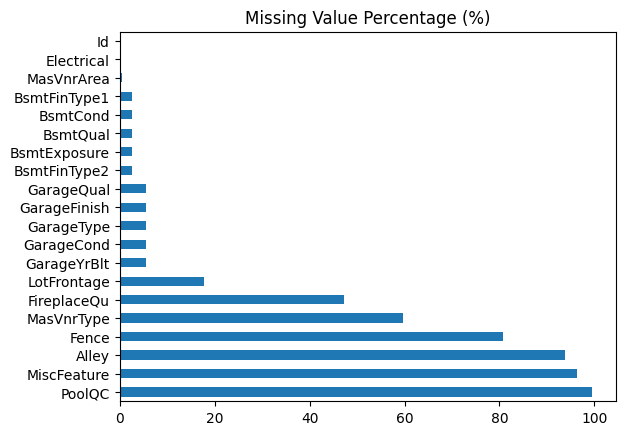

In [9]:
missing_vals_pct.head(20).plot(kind='barh')
plt.title('Missing Value Percentage (%)')
plt.show()

In [10]:
train_df[missing_df.index].loc[train_df['GarageType'].isnull()]

PoolQC MiscFeature Alley  Fence MasVnrType FireplaceQu  LotFrontage  \
39      NaN         NaN   NaN    NaN        NaN         NaN         65.0   
48      NaN         NaN   NaN    NaN        NaN         NaN         33.0   
78      NaN         NaN   NaN    NaN        NaN         NaN         72.0   
88      NaN         NaN   NaN  MnPrv        NaN         NaN        105.0   
89      NaN         NaN   NaN    NaN        NaN         NaN         60.0   
...     ...         ...   ...    ...        ...         ...          ...   
1349    NaN         NaN  Pave    NaN        NaN         NaN         50.0   
1407    NaN         NaN   NaN  MnPrv        NaN         NaN          NaN   
1449    NaN         NaN   NaN    NaN        NaN         NaN         21.0   
1450    NaN         NaN   NaN    NaN        NaN         NaN         60.0   
1453    NaN         NaN   NaN    NaN        NaN         NaN         90.0   

      GarageYrBlt GarageCond GarageType GarageFinish GarageQual BsmtFinType2  \
39            NaN        NaN        NaN          NaN        NaN          NaN   
48            NaN        NaN        NaN          NaN        NaN          Unf   
78            NaN        NaN        NaN          NaN        NaN          Unf   
88            NaN        NaN        NaN          NaN        NaN          Unf   
89            NaN        NaN        NaN          NaN        NaN          Unf   
...           ...        ...        ...          ...        ...          ...   
1349          NaN        NaN        NaN          NaN        NaN          Unf   
1407          NaN        NaN        NaN          NaN        NaN          Unf   
1449          NaN        NaN        NaN          NaN        NaN          Unf   
1450          NaN        NaN        NaN          NaN        NaN          Unf   
1453          NaN        NaN        NaN          NaN        NaN          Unf   

     BsmtExposure BsmtQual BsmtCond BsmtFinType1  MasVnrArea Electrical  
39            NaN      NaN      NaN          NaN         0.0      FuseP  
48             No       TA       TA          Unf         0.0      SBrkr  
78             No       TA       TA          Unf         0.0      SBrkr  
88             No       TA       Fa          Unf         0.0      SBrkr  
89             No       Gd       TA          GLQ         0.0      SBrkr  
...           ...      ...      ...          ...         ...        ...  
1349           No       TA       Fa          LwQ         0.0      SBrkr  
1407           No       TA       TA          ALQ         0.0      SBrkr  
1449           Av       Gd       TA          GLQ         0.0      SBrkr  
1450           No       Gd       TA          Unf         0.0      SBrkr  
1453           No       Gd       TA          Unf         0.0      SBrkr  

[81 rows x 19 columns]

Pool quality

In [11]:
# poor quality is mising when pool area is 0
train_df[['PoolQC', 'PoolArea']].loc[train_df['PoolQC'].isnull()]['PoolArea'].value_counts()

PoolArea
0    1453
Name: count, dtype: int64

Misc Feature

In [12]:
train_df[['MiscFeature', 'MiscVal']].loc[train_df['MiscFeature'].isnull()]['MiscVal'].value_counts()

MiscVal
0    1406
Name: count, dtype: int64

Garage

In [13]:
train_df.filter(like='Garage').loc[train_df['GarageType'].isnull()]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
39          NaN          NaN          NaN           0           0        NaN   
48          NaN          NaN          NaN           0           0        NaN   
78          NaN          NaN          NaN           0           0        NaN   
88          NaN          NaN          NaN           0           0        NaN   
89          NaN          NaN          NaN           0           0        NaN   
...         ...          ...          ...         ...         ...        ...   
1349        NaN          NaN          NaN           0           0        NaN   
1407        NaN          NaN          NaN           0           0        NaN   
1449        NaN          NaN          NaN           0           0        NaN   
1450        NaN          NaN          NaN           0           0        NaN   
1453        NaN          NaN          NaN           0           0        NaN   

     GarageCond  
39          NaN  
48          NaN  
78          NaN  
88          NaN  
89          NaN  
...         ...  
1349        NaN  
1407        NaN  
1449        NaN  
1450        NaN  
1453        NaN  

[81 rows x 7 columns]

We can see that where there is null for a garage it means that that property does not have one.

For the two variables with the greatest amount of missing data, it seems to reflect the fact that these properties do not have a pool or misc features. Therefore, we can impute with 'None'

In [11]:
def impute_cat_cols(df: pd.DataFrame) -> pd.DataFrame:
    cols = df.select_dtypes(include='object').columns
    df[cols] = df[cols].fillna('None')
    return df

In [15]:
train_df.filter(items=['MasVnrType', 'MasVnrArea']).loc[train_df['MasVnrArea'].isnull()]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

In [16]:
train_df.filter(items=['MasVnrType', 'MasVnrArea']).loc[train_df['MasVnrType'].isnull()]


MasVnrType  MasVnrArea
1           NaN         0.0
3           NaN         0.0
5           NaN         0.0
8           NaN         0.0
9           NaN         0.0
...         ...         ...
1454        NaN         0.0
1455        NaN         0.0
1457        NaN         0.0
1458        NaN         0.0
1459        NaN         0.0

[872 rows x 2 columns]

In [12]:
def drop_id_col(df: pd.DataFrame) -> pd.DataFrame:
    return df.drop(columns='Id')

In [13]:
def impute_mass_area(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'MasVnrArea'] = df['MasVnrArea'].fillna(0)
    return df

In [14]:
def impute_lot_frontage(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    return df

In [15]:
def impute_garage_year(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
    return df

In [16]:
def pipeline(df: pd.DataFrame) -> pd.DataFrame:
    return (
        df.pipe(impute_cat_cols)
        .pipe(impute_mass_area)
        .pipe(impute_lot_frontage)
        .pipe(impute_garage_year)
        .pipe(drop_id_col)
    )

Run cleaning pipeline on both train and test data

In [17]:
processed_train_df = pipeline(train_df)
processed_test_df = pipeline(test_df)

Check that there are no null values

In [23]:
processed_train_df.isnull().sum().sort_values(ascending=False).head(3)

MSSubClass     0
MSZoning       0
GarageYrBlt    0
dtype: int64

There are now no missing values in the dataset.

Save cleaned data to processed data directory

In [24]:
def save_data(df: pd.DataFrame, dir: str, file: str) -> None:
    """Save a dataframe to a chosen directory.

    Args:
        df (pd.DataFrame): pandas dataframe
        dir (str): directory to save the file
        file (str): file name
    """
    file_dir = Path.cwd().parent / "data" / dir 
    if not file_dir.exists():
        file_dir.mkdir(parents=True, exist_ok=True)
    df.to_pickle(file_dir / file)

In [25]:
save_data(processed_train_df, 'processed', 'pro_train.pkl')
save_data(processed_test_df, 'processed', 'pro_test.pkl')

In [26]:
new_df = pd.read_csv(Path.cwd().parent / 'data' / 'processed' / 'pro_train.csv')

## Exploration

I will now explore the data using the new processed dataset. Exploration will include:
- visualising numerical and categorical distributions
- plotting the pairwise relationships between variables. Important for understanding multicollinearity between variables.
- specifically looking at the relationships between the target variable (SalePrice) and the other variables
- correlation matrix

## Visualise distributions

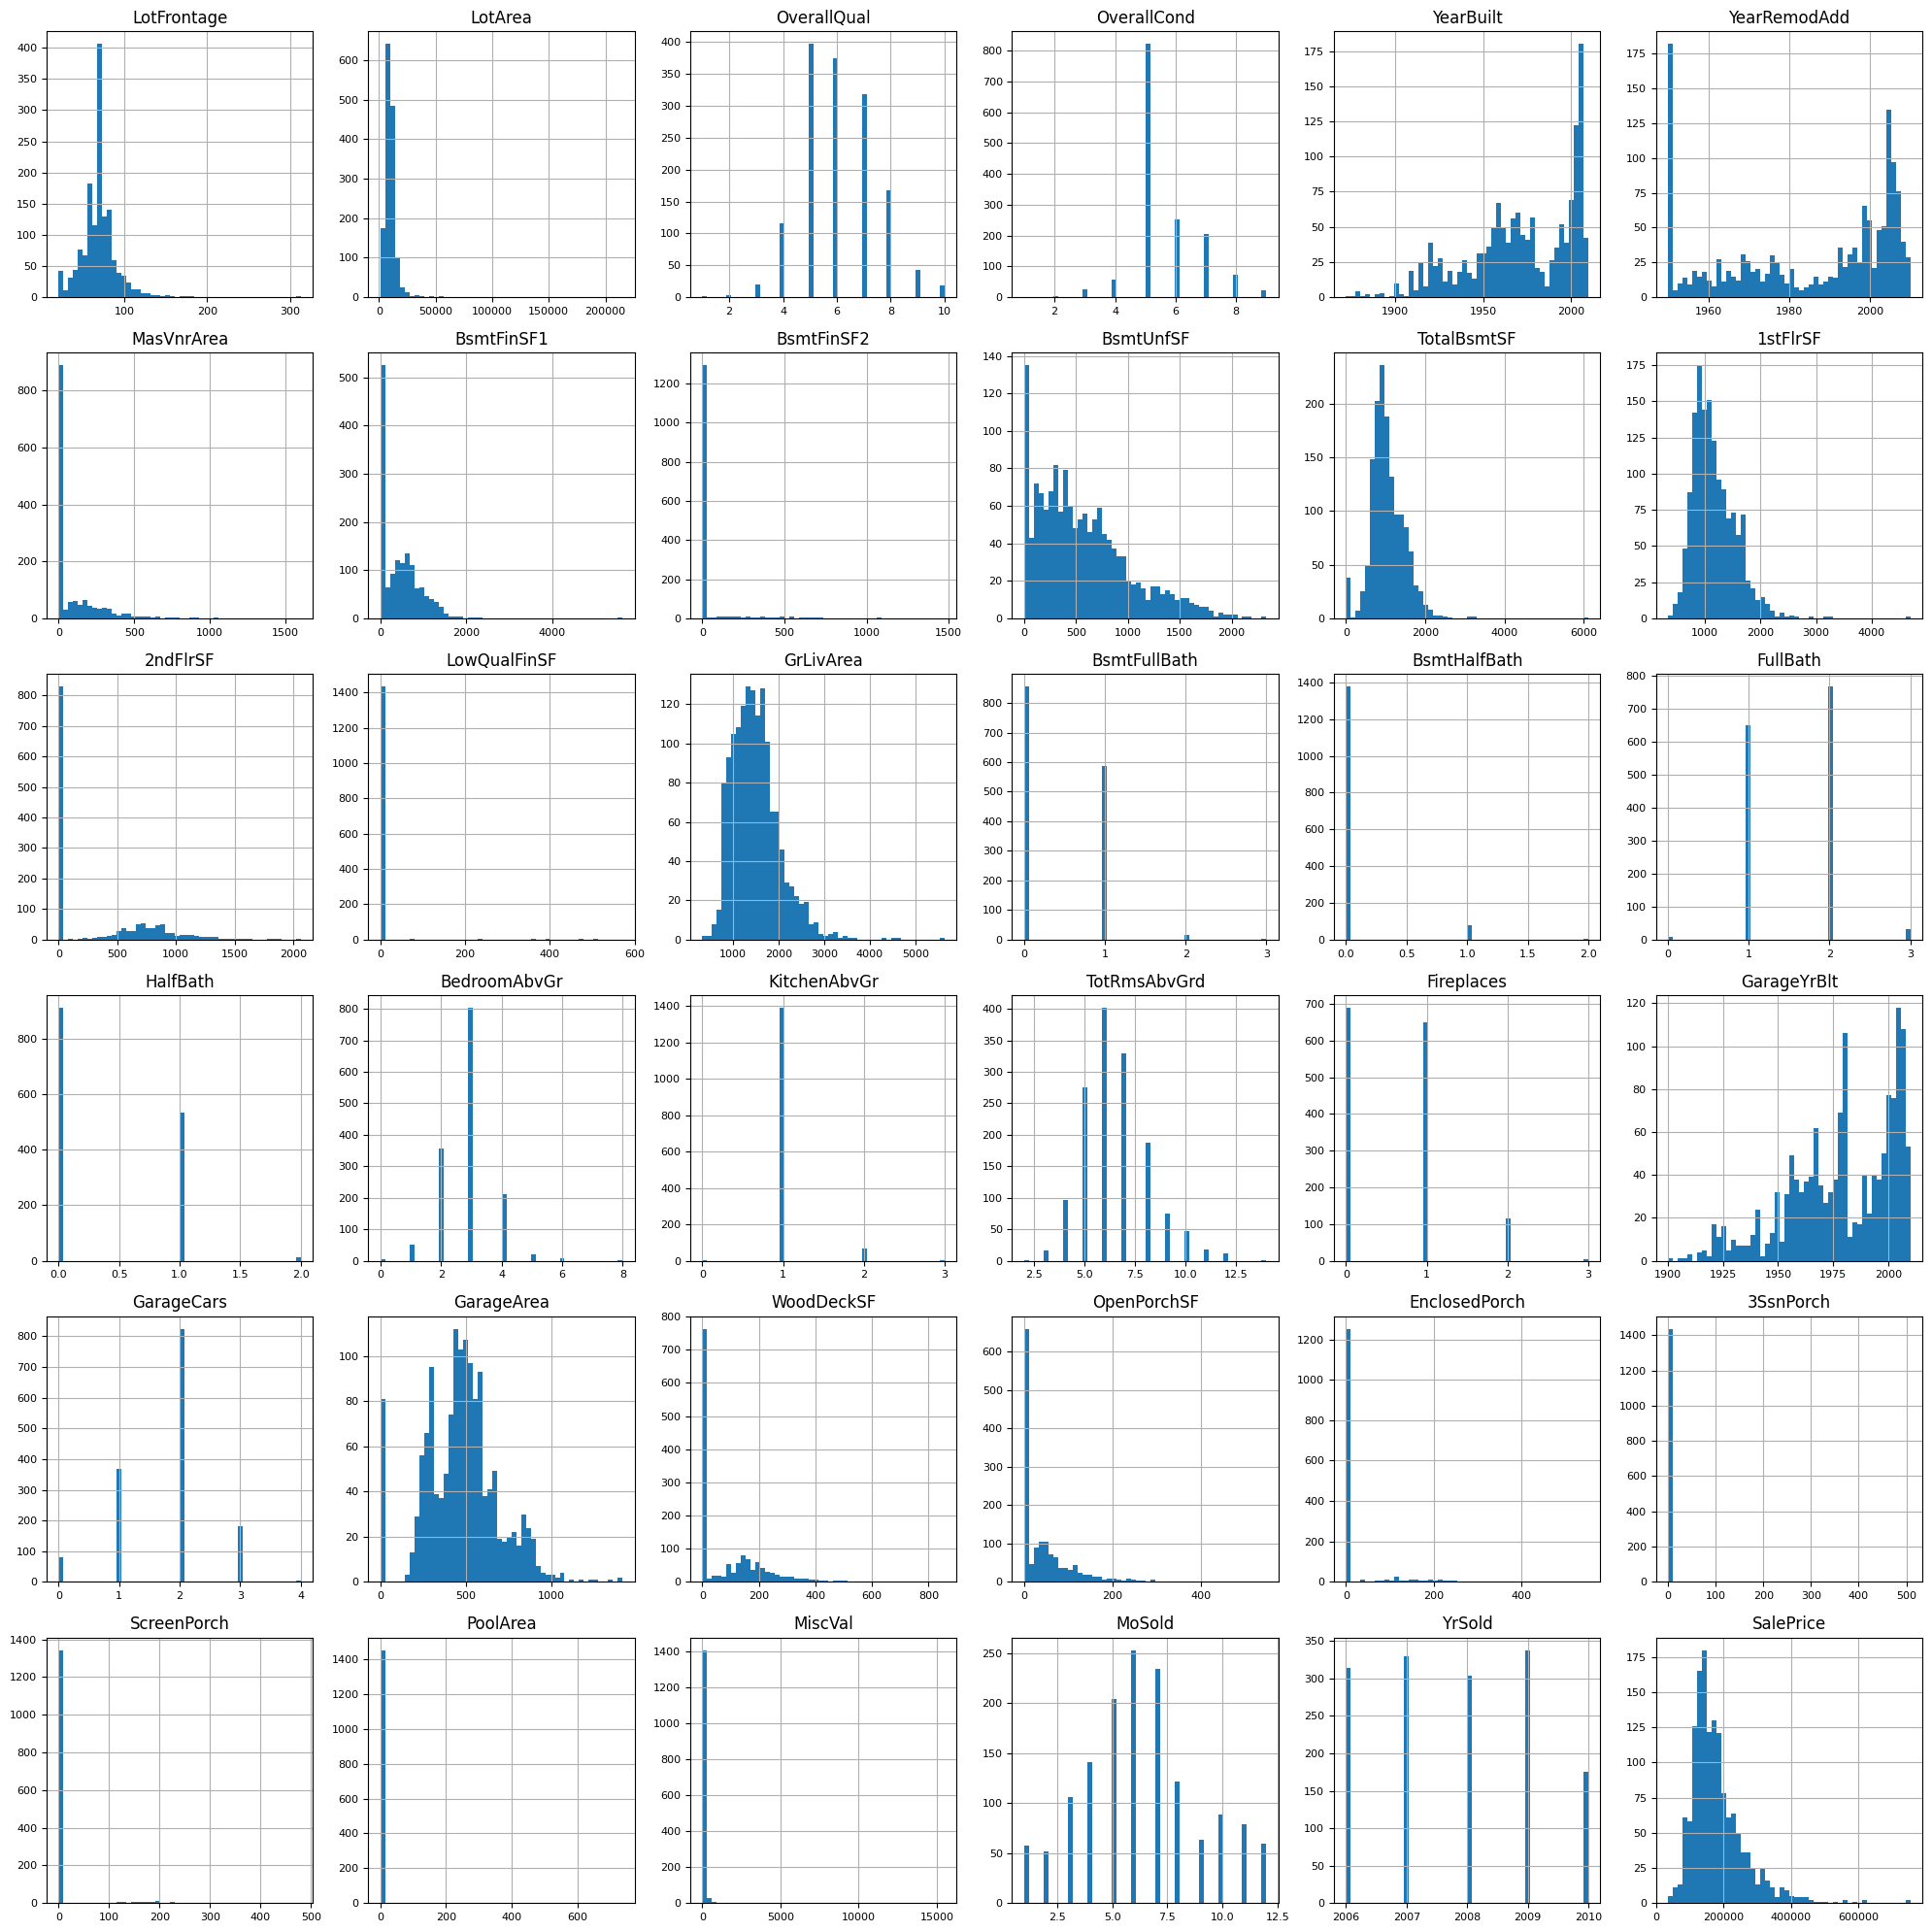

In [26]:
processed_train_df.iloc[:, 1:].hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

Categorical variables with the most values

In [27]:
processed_train_df.select_dtypes(include='object').nunique().sort_values(ascending=False).head()

Neighborhood    25
Exterior2nd     16
Exterior1st     15
SaleType         9
Condition1       9
dtype: int64

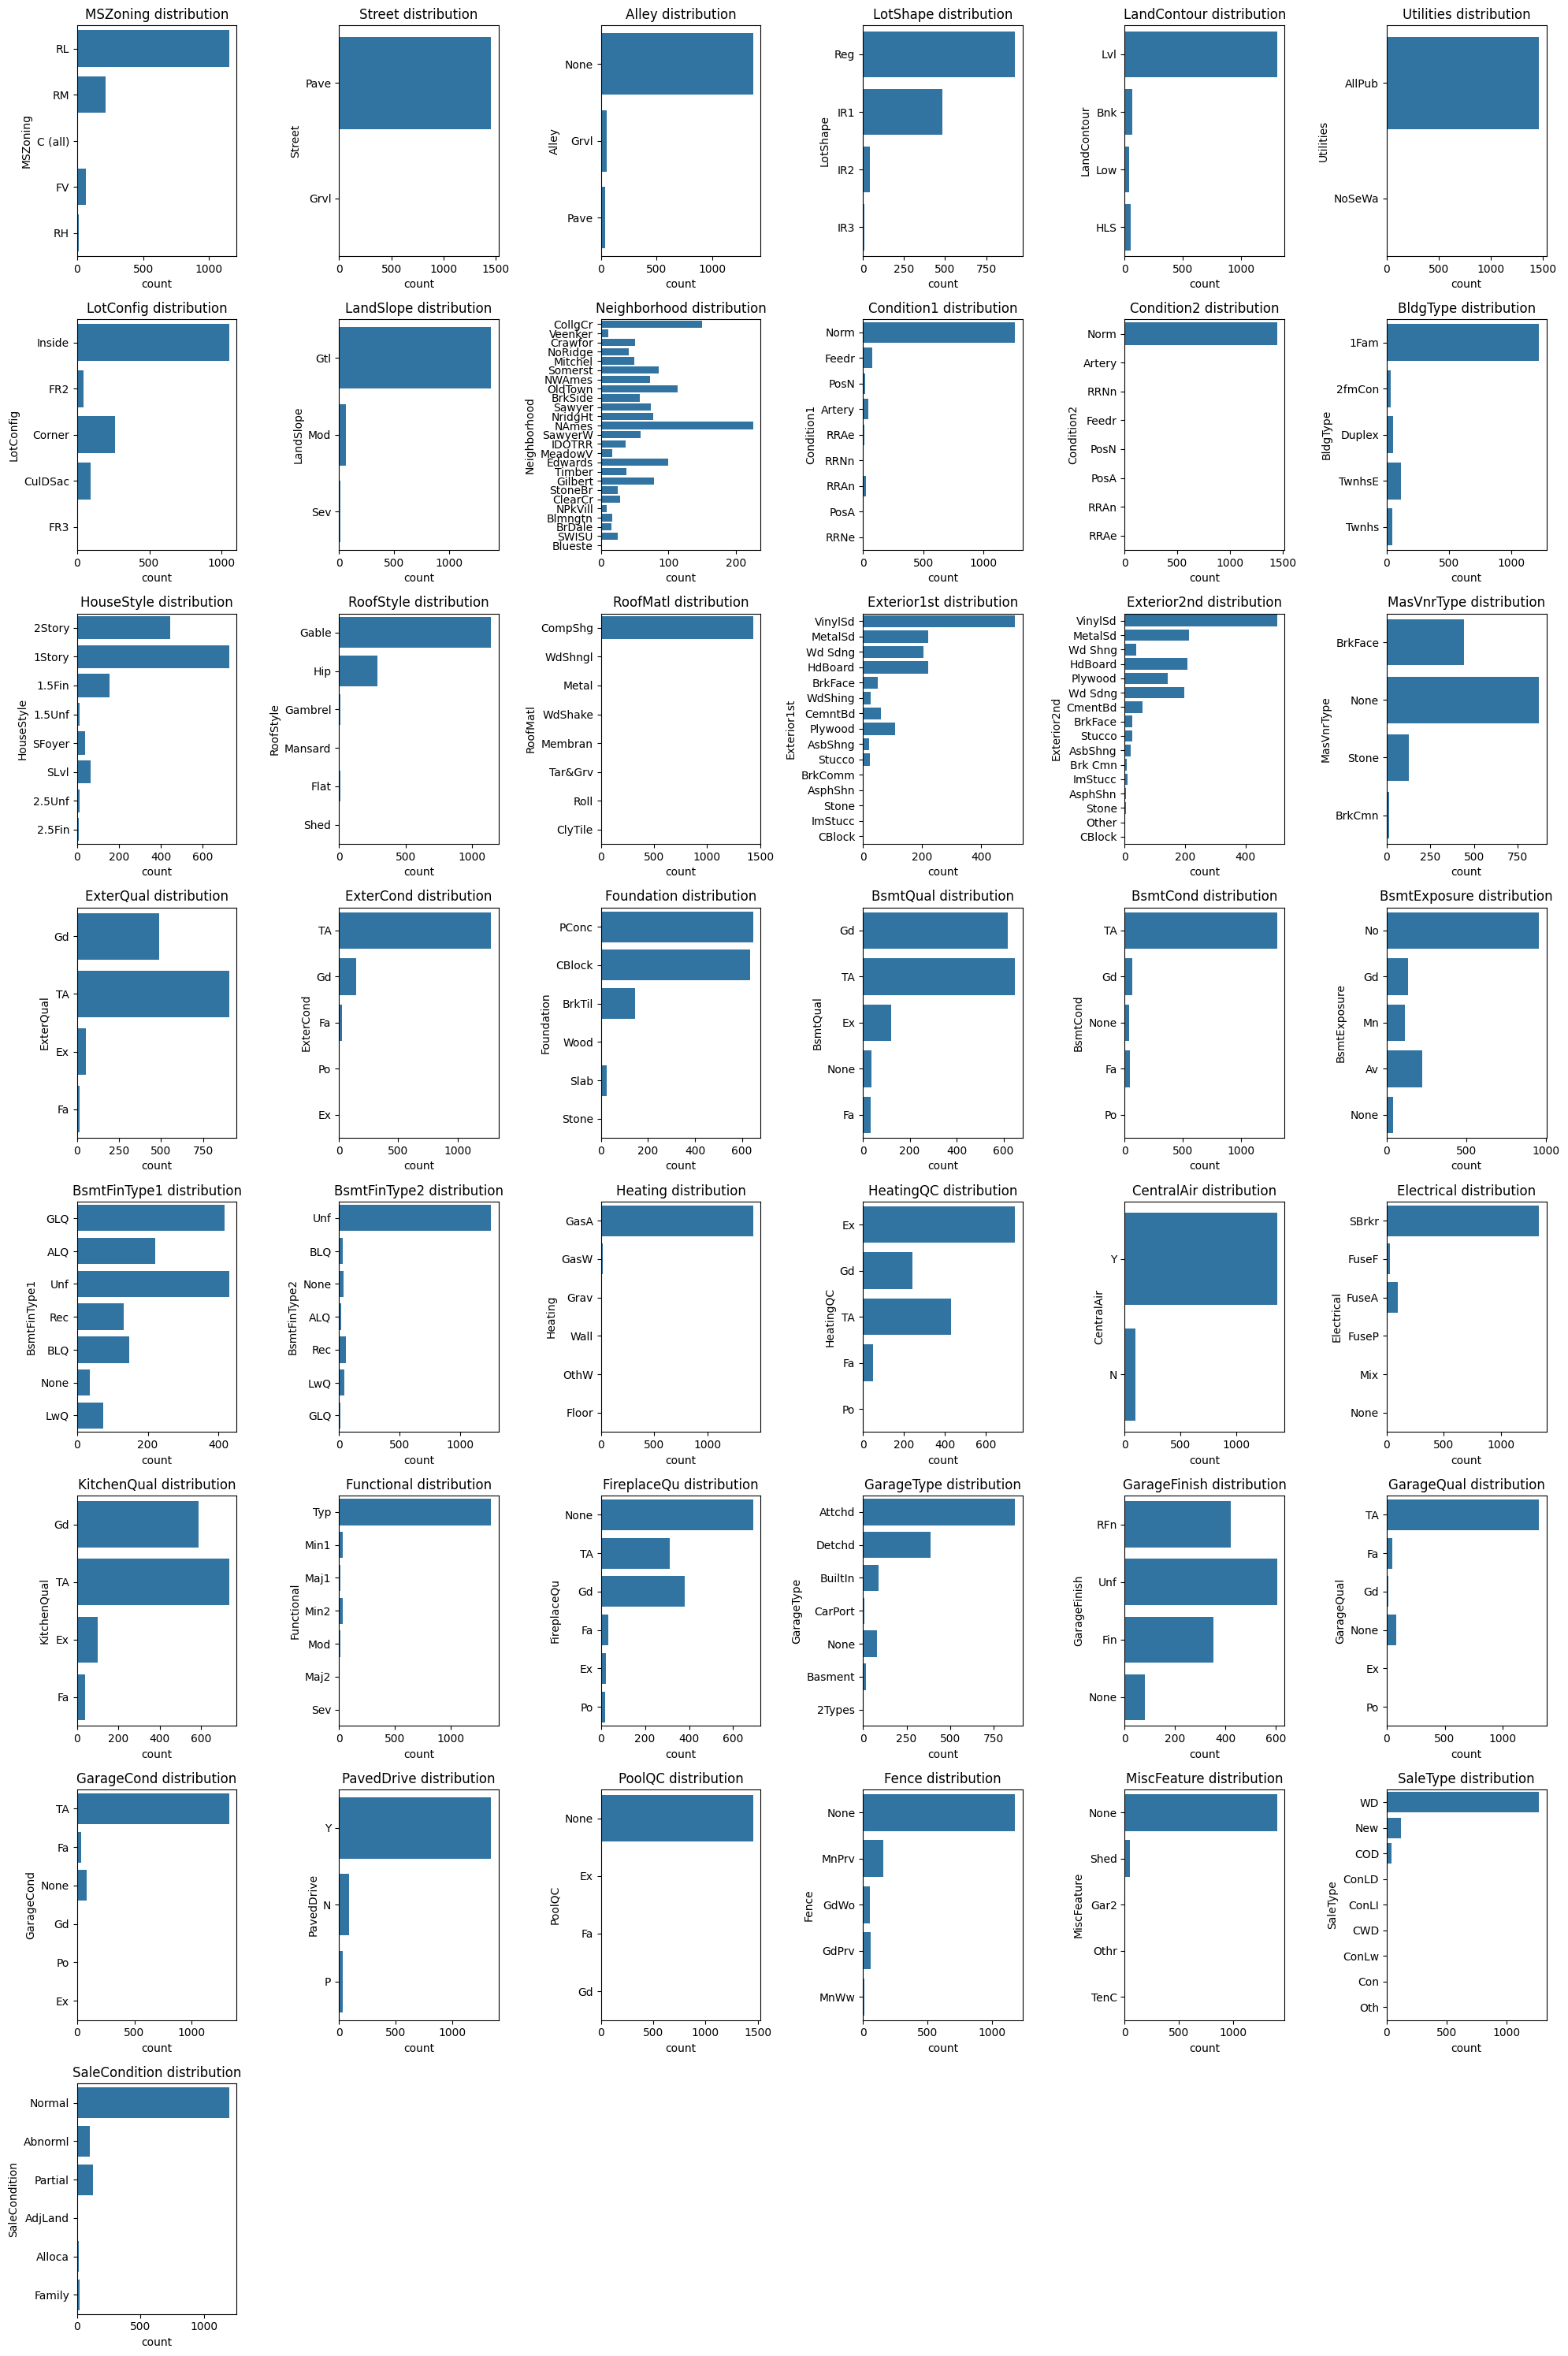

In [28]:
cat_cols = processed_train_df.select_dtypes(include='object').columns.tolist()
data = processed_train_df[cat_cols]

fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(20, 30))

# remove any empty plots
for i in range(len(cat_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for ax, var in zip(axes.flatten(), data.columns):
    sns.countplot(data[var], ax=ax)
    ax.set_title(f'{var} distribution')

plt.tight_layout()
plt.show()


## Distribution of categorical variables in relation to SalePrice

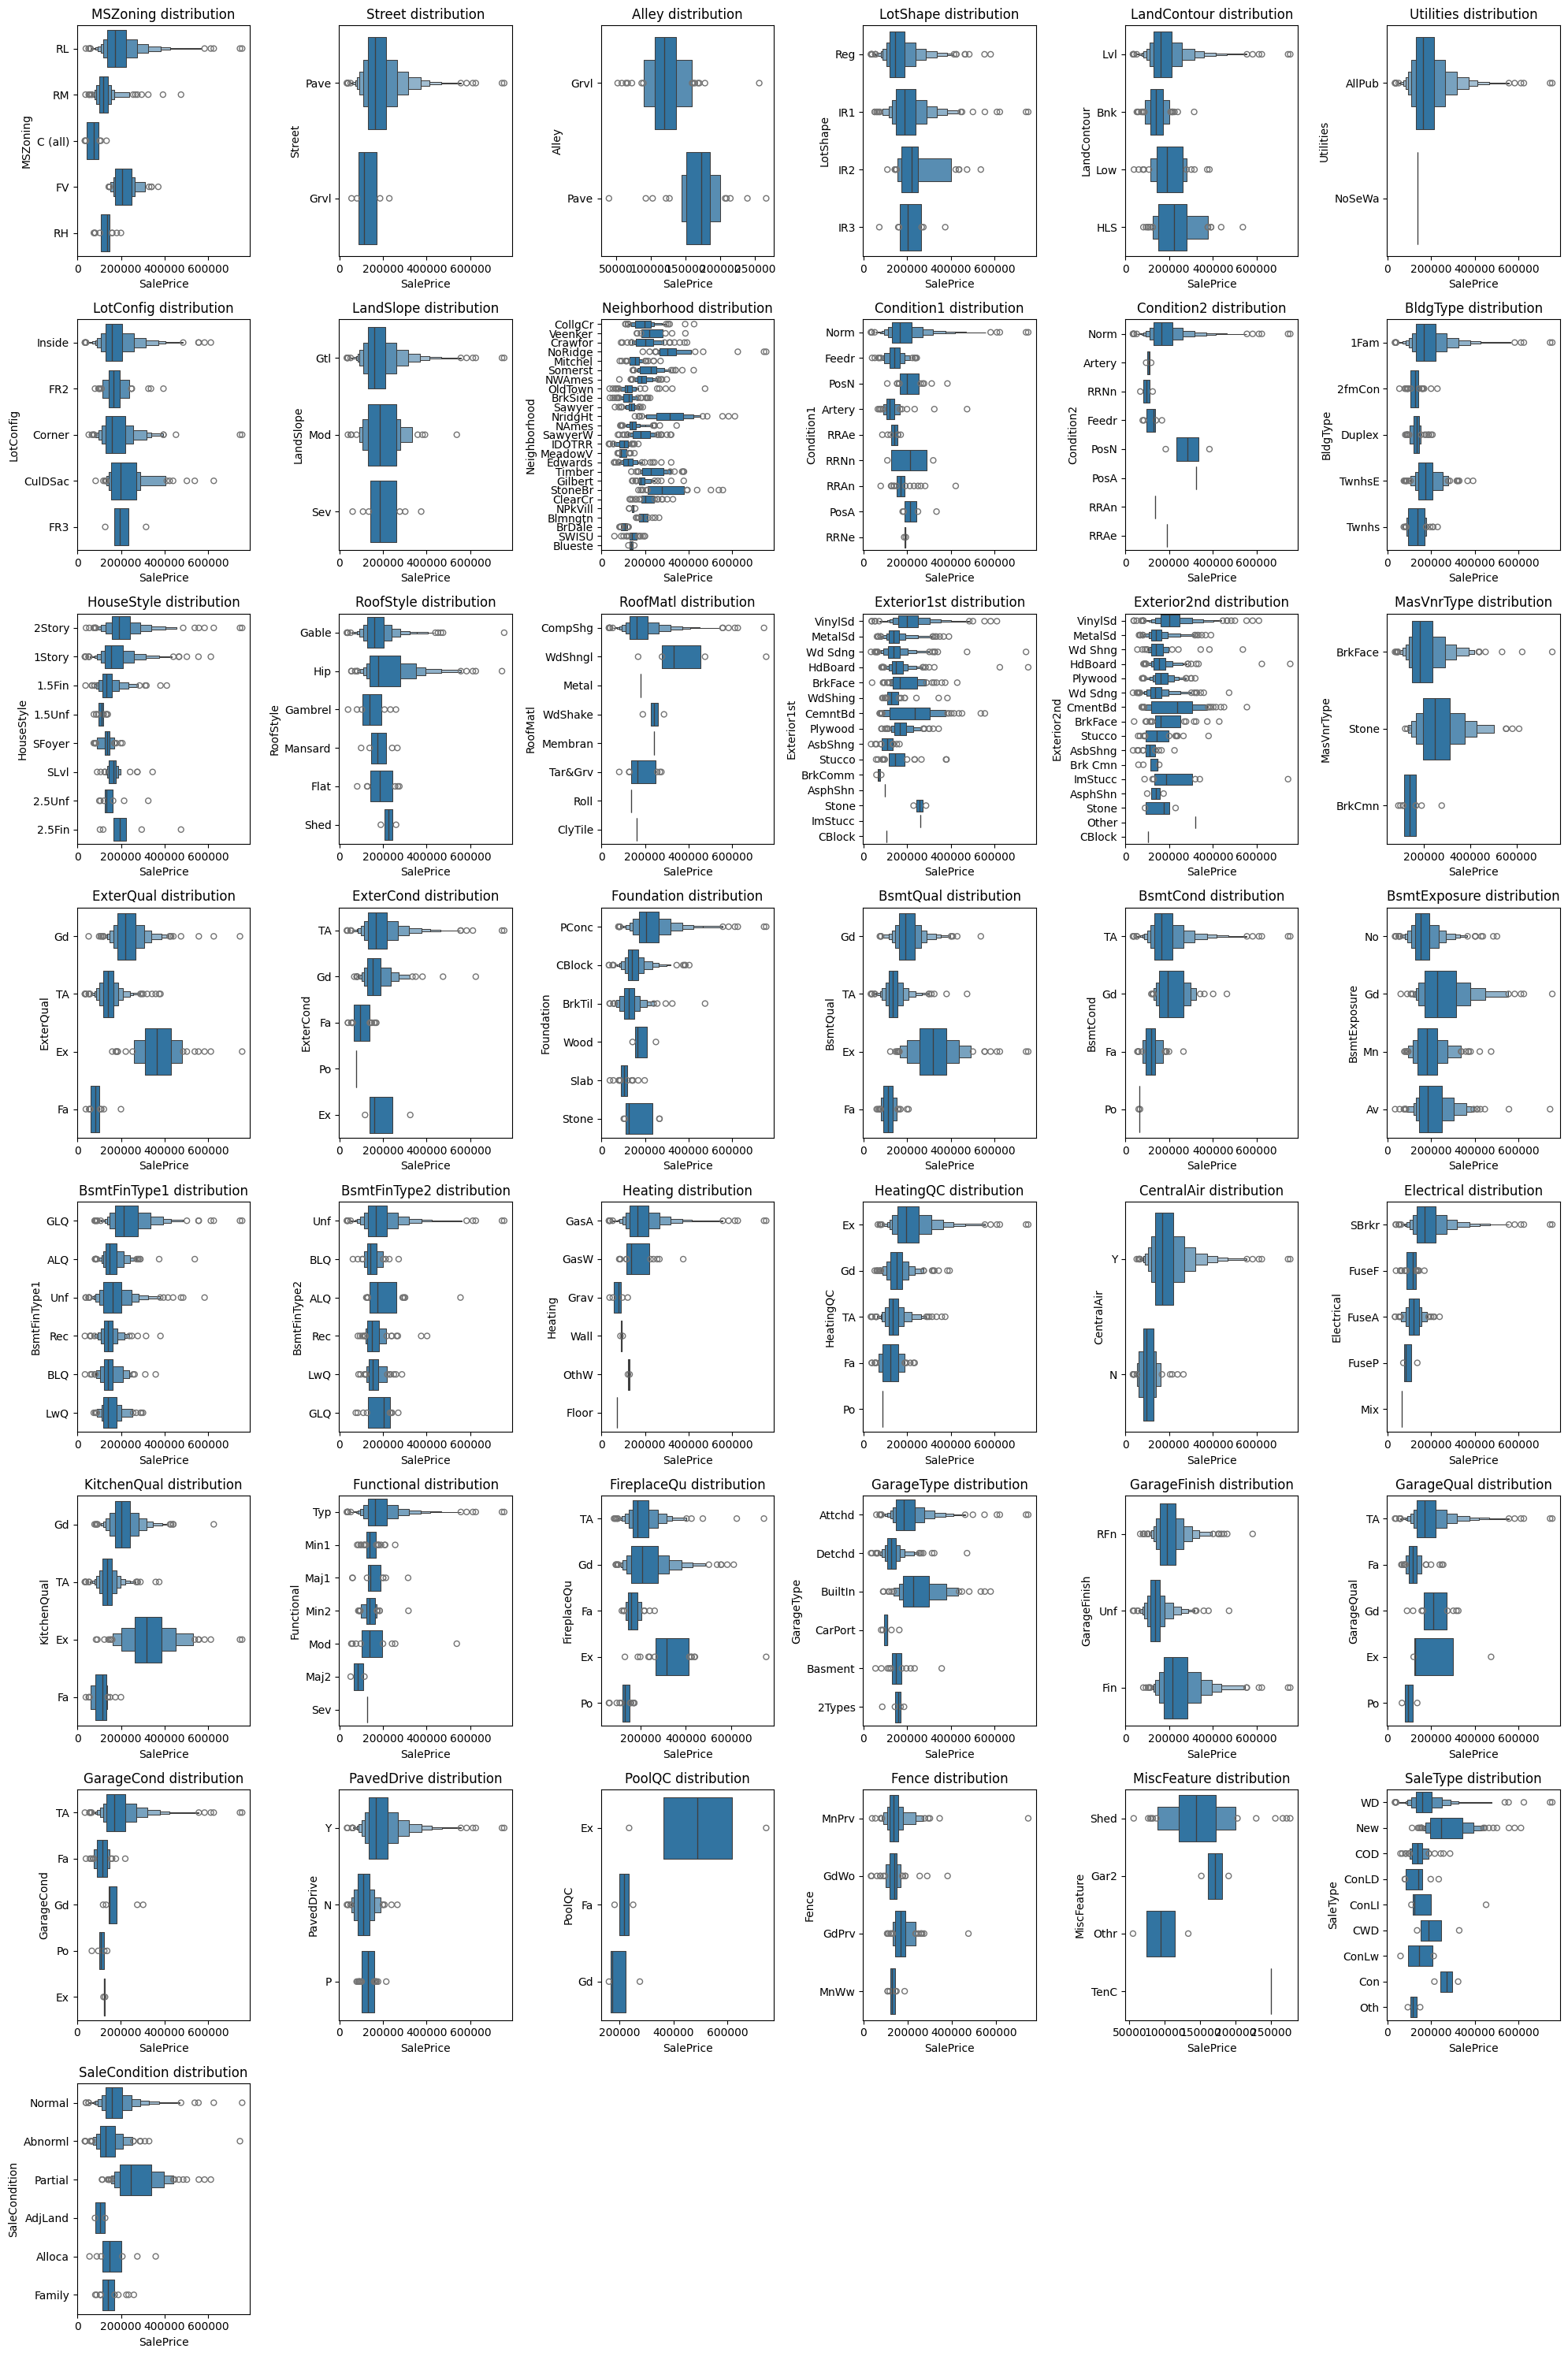

In [29]:
cat_cols_2 = cat_cols + ['SalePrice']
data = train_df[cat_cols_2]

fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(20, 30))

# remove any empty plots
for i in range(len(cat_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for ax, var in zip(axes.flatten(), cat_cols):
    sns.boxenplot(y=data[var], x=data['SalePrice'], ax=ax)
    ax.set_title(f'{var} distribution')
    
plt.tight_layout()
plt.show()

There are a number of categorical variables that offer some explanation in variance of property sale price. For example, the SalePrice distribution of kitchen quality reflects higher property prices for 'Ex' kitchens in comparison with poorer quality type kitchens. A likely explanation for this is home owners with more disposable income can afford to have nicer kitchens whereas a person with less money would have to suffice with the a lower quality kitchen which is a product of buying a property with a lower value. Having a more income results in being able to purchase more expensive properties and hence be able to afford nicer property features.

### Target Variable (SalePrice) Investigation

In [30]:
processed_train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

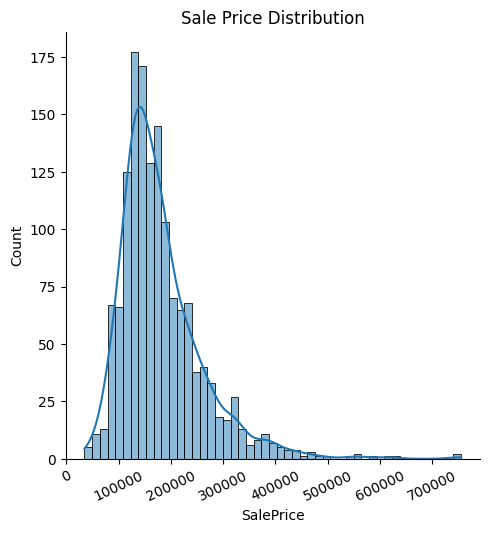

In [31]:
sns.displot(processed_train_df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.xticks(rotation=25)
plt.show()

Disribution is skewed to the right indicating that a log transform is needed to create a more normal distribution

## Check for outliers

In [32]:
df = processed_train_df.select_dtypes(include='number')

# check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)
outlier_pct = (outliers / len(df) * 100).round(2)

outlier_df = pd.DataFrame({'outliers': outliers, 'outlier_pct': outlier_pct})
outlier_df.head(20)

outliers  outlier_pct
EnclosedPorch       208        14.25
BsmtFinSF2          167        11.44
OverallCond         125         8.56
ScreenPorch         116         7.95
LotFrontage         106         7.26
MSSubClass          103         7.05
MasVnrArea           98         6.71
BsmtHalfBath         82         5.62
OpenPorchSF          77         5.27
LotArea              69         4.73
KitchenAbvGr         68         4.66
SalePrice            61         4.18
TotalBsmtSF          61         4.18
MiscVal              52         3.56
BedroomAbvGr         35         2.40
WoodDeckSF           32         2.19
GrLivArea            31         2.12
TotRmsAbvGrd         30         2.05
BsmtUnfSF            29         1.99
LowQualFinSF         26         1.78

There are some variables with a number of outliers, feature scaling will attempt to solve this - feature scaling will be implemented in our model building pipeline.

## Pairwise Analysis

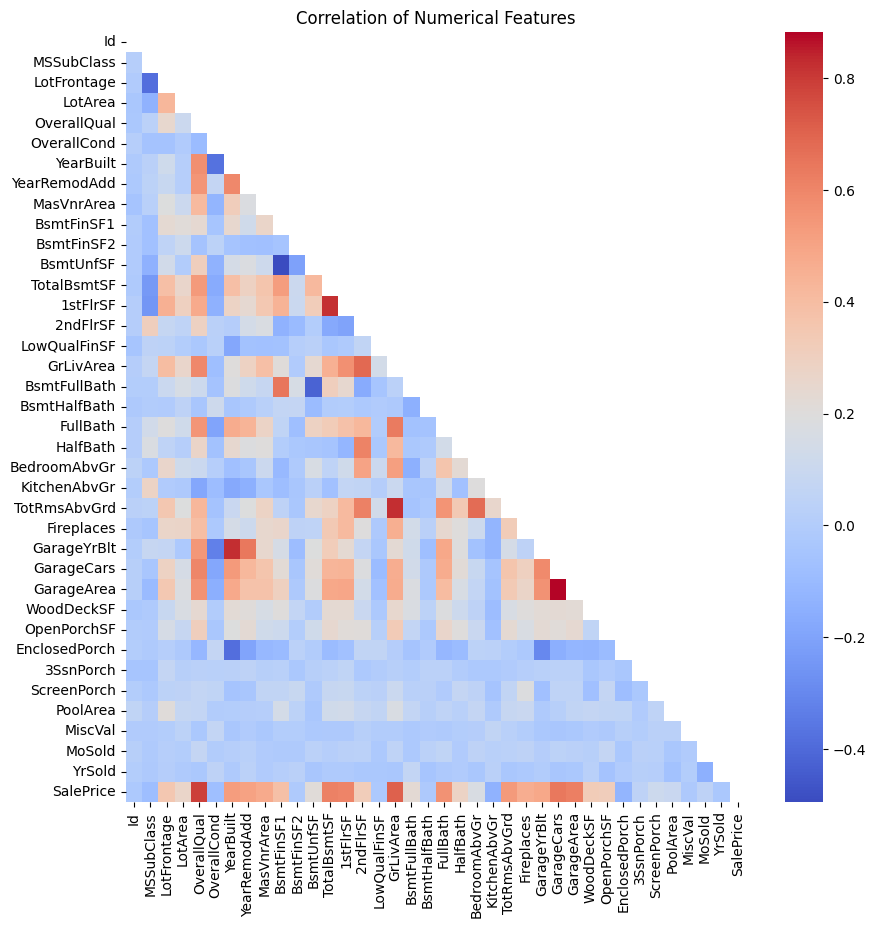

In [33]:
fig = plt.figure(figsize=(10, 10))

corr = train_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm')
plt.title('Correlation of Numerical Features')
plt.show()

Some features are correlated with each other therefore may lead to multicollinearity. To avoid this, we can check the variance inflation factor to remove collinear variables.

Plot relationships between SalePrice and numerical variables

In [34]:
def relationships(
    df: pd.DataFrame,
    y: str,
    X: list[str],
    hue: str = None,
    palette: str = None,
    nrows: int = 4,
    ncols: int = 4,
    figsize: tuple[int, int] = (15, 15),
) -> None:
    """Plots relationships between y and X.

    Args:
        y (str): dependent variable
        X (list[str]): list of independent variables
        hue (str, optional): column to hue by. Defaults to None.
        palette (str, optional): colour palette. Defaults to None.
        nrows (int, optional): plot grid rows. Defaults to 4.
        ncols (int, optional): plot grid columns. Defaults to 4.
        save_to (str, optional): filename to save to. Defaults to None.
    """
    # make sure y is not in X
    X = [col for col in X if col != y]

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # remove empty subplots
    for i in range(len(X), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    for stat, ax in zip(X, axes.flatten()):
        sns.scatterplot(
            data=df,
            x=stat,
            y=y,
            hue=hue,
            palette=palette,
            ax=ax,
            legend=True,
        )
        ax.set_title(f"{y} vs {stat}")
        ax.set_xlabel(stat)
        ax.set_ylabel(y)
        ax.get_legend().remove()
        plt.setp(ax.get_xticklabels(), rotation=15)

        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
            
    # set legend
    handles, labels = axes.flatten()[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        bbox_to_anchor=(1, 1),
        title=hue,
    )


    plt.suptitle(f"{y} vs Related Stats", fontsize=20)
    plt.tight_layout()
    plt.show()

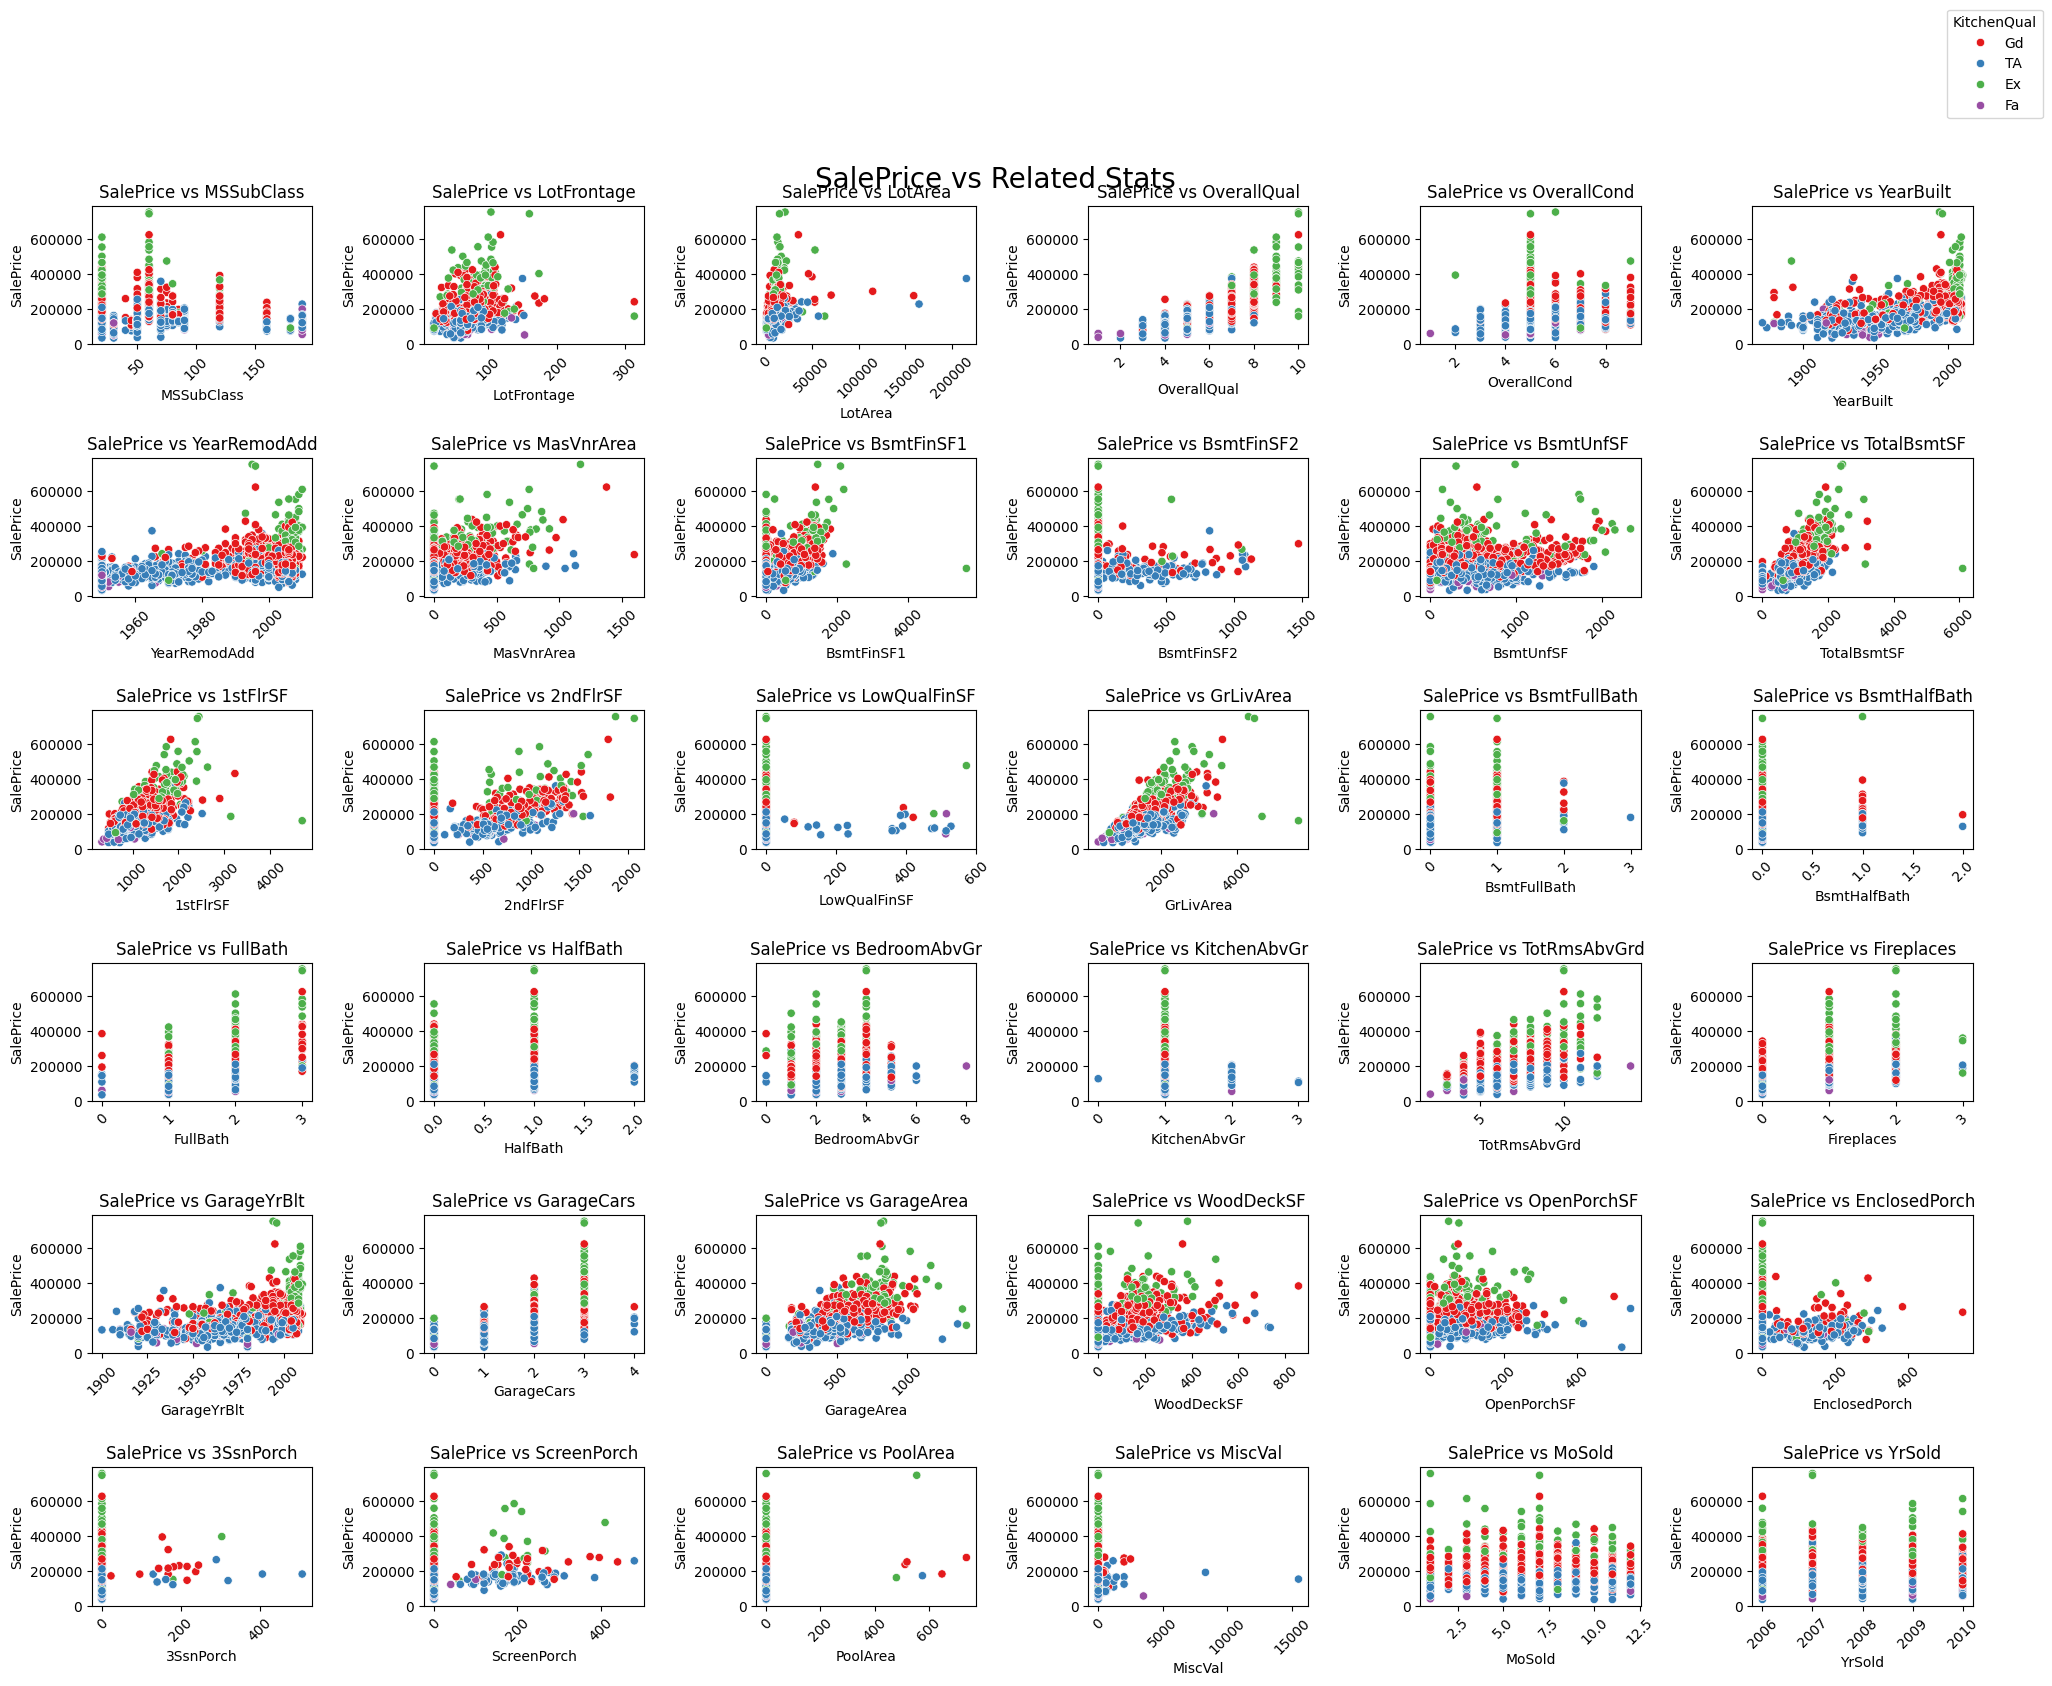

In [35]:
relationships(
    df=processed_train_df,
    y='SalePrice',
    X=processed_train_df.select_dtypes(include='number').columns.tolist(),
    hue='KitchenQual',
    palette='Set1',
    nrows=8,
    ncols=6,
    figsize=(20, 20),
)

When we plot the relationships of each numerical variable and SalePrice hued by Kitchen quality there are some notable trends. For example, when we look at the relationship between SalePrice and GarageYrBlt, we can see that garages built recently (post-2000) tend to also have kitchens of higher quality. This may indicate that these are new build homes hence the building of a new garage while also fitting a new high quality kitchen. This may also reflect wider socio-economic issues faced in the 21st century where housing has become less and less affordable because of the lack of affordable housing being built leading to problems such as homelessness.  

Correlations of numeric variables with SalePrice

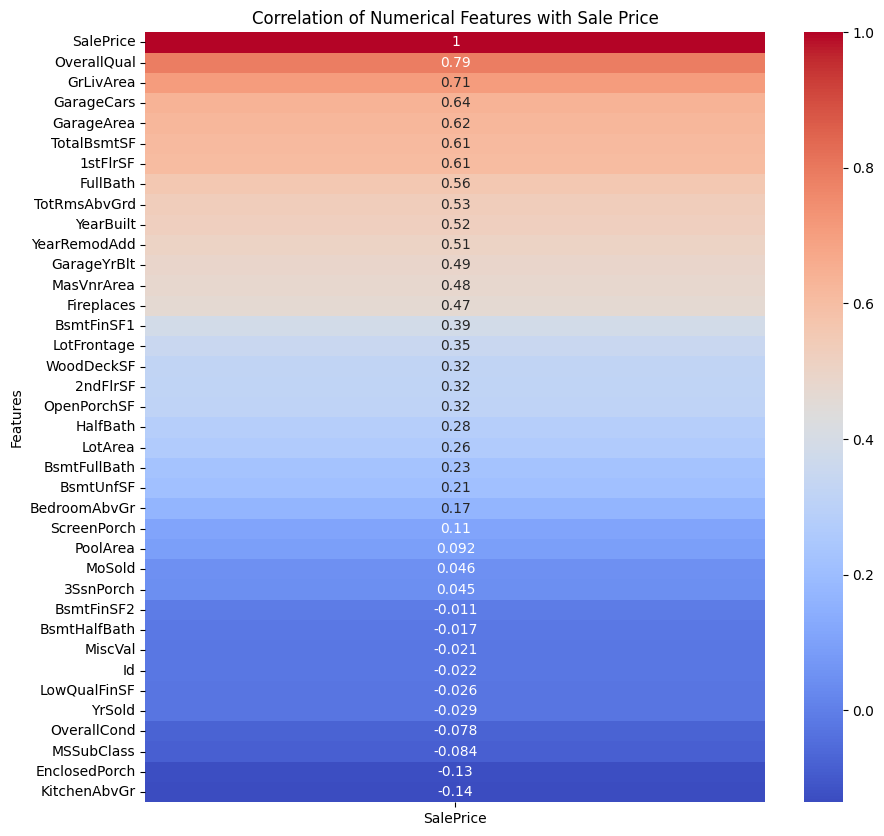

In [36]:
fig = plt.figure(figsize=(10, 10))
y_cors = train_df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False)
sns.heatmap(y_cors, annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features with Sale Price')
plt.ylabel('Features')
plt.show()

Check the statistical significance of each correlation

In [37]:
def corr_significance(df: pd.DataFrame, y_var: str = "SalePrice"):
    """Calculate the correlation and the correlation significance of all columns in the dataframe

    Args:
        df (pd.DataFrame): training data
        y_var (str): target variable. Defaults to "SalePrice".

    Returns:
        pd.DataFrame: Correlation significance dataframe
    """
    num_cols = df.select_dtypes(include="number").columns

    def calculate_corr(col: str, i: int):
        return round(pearsonr(df[col], df[y_var])[i], 4)

    stats = [
        {
            "Variable": col,
            "correlation": calculate_corr(col, 0),
            "p-value": calculate_corr(col, 1),
            "significant": True if calculate_corr(col, 1) < 0.05 else False,
        }
        for col in num_cols
    ]
    return (
        pd.DataFrame(stats)
        .sort_values(by="correlation", ascending=False)
        .reset_index(drop=True)
    )

In [38]:
y_var_corr_sig = corr_significance(processed_train_df)
y_var_corr_sig

Variable  correlation  p-value  significant
0       SalePrice       1.0000   0.0000         True
1     OverallQual       0.7910   0.0000         True
2       GrLivArea       0.7086   0.0000         True
3      GarageCars       0.6404   0.0000         True
4      GarageArea       0.6234   0.0000         True
5     TotalBsmtSF       0.6136   0.0000         True
6        1stFlrSF       0.6059   0.0000         True
7        FullBath       0.5607   0.0000         True
8    TotRmsAbvGrd       0.5337   0.0000         True
9       YearBuilt       0.5229   0.0000         True
10   YearRemodAdd       0.5071   0.0000         True
11     MasVnrArea       0.4726   0.0000         True
12     Fireplaces       0.4669   0.0000         True
13    GarageYrBlt       0.4668   0.0000         True
14     BsmtFinSF1       0.3864   0.0000         True
15    LotFrontage       0.3348   0.0000         True
16     WoodDeckSF       0.3244   0.0000         True
17       2ndFlrSF       0.3193   0.0000         True
18    OpenPorchSF       0.3159   0.0000         True
19       HalfBath       0.2841   0.0000         True
20        LotArea       0.2638   0.0000         True
21   BsmtFullBath       0.2271   0.0000         True
22      BsmtUnfSF       0.2145   0.0000         True
23   BedroomAbvGr       0.1682   0.0000         True
24    ScreenPorch       0.1114   0.0000         True
25       PoolArea       0.0924   0.0004         True
26         MoSold       0.0464   0.0761        False
27      3SsnPorch       0.0446   0.0886        False
28     BsmtFinSF2      -0.0114   0.6640        False
29   BsmtHalfBath      -0.0168   0.5202        False
30        MiscVal      -0.0212   0.4185        False
31   LowQualFinSF      -0.0256   0.3282        False
32         YrSold      -0.0289   0.2694        False
33    OverallCond      -0.0779   0.0029         True
34     MSSubClass      -0.0843   0.0013         True
35  EnclosedPorch      -0.1286   0.0000         True
36   KitchenAbvGr      -0.1359   0.0000         True

The correlations between SalePrice and eight explanatory variables are not statistically significant - correlation is more extreme than what chance might produce.

In [39]:
def check_multicollinearity(df: pd.DataFrame) -> pd.DataFrame:
    """Check for multicollinearity using the variance inflation factor (VIF).

    Args:
        df (pd.DataFrame): pandas dataframe

    Returns:
        pd.DataFrame: pandas dataframe with VIF results
    """
    # Ensure that the dataframe contains only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number])
    
    # Drop the target variable
    numeric_columns = numeric_columns.drop("SalePrice", axis=1)

    # Convert the numeric columns to a numpy array
    num_values = numeric_columns.values

    # Calculate VIF
    vif = pd.DataFrame()
    vif["VIF Factor"] = [
        variance_inflation_factor(num_values, i) for i in range(num_values.shape[1])
    ]
    vif["features"] = numeric_columns.columns
    return vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

In [40]:
check_multicollinearity(processed_train_df)

/Users/conal/Projects/kaggle_comps/house_prices_adv_reg/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF Factor       features
0            inf     BsmtFinSF2
1            inf     BsmtFinSF1
2            inf      GrLivArea
3            inf   LowQualFinSF
4            inf       2ndFlrSF
5            inf       1stFlrSF
6            inf    TotalBsmtSF
7            inf      BsmtUnfSF
8   2.404984e+04         YrSold
9   2.251703e+04    GarageYrBlt
10  2.241501e+04   YearRemodAdd
11  2.128391e+04      YearBuilt
12  8.344719e+01   TotRmsAbvGrd
13  6.659442e+01    OverallQual
14  4.167002e+01    OverallCond
15  3.752022e+01   KitchenAbvGr
16  3.680061e+01     GarageCars
17  3.218701e+01     GarageArea
18  3.108438e+01   BedroomAbvGr
19  2.667944e+01       FullBath
20  1.733722e+01    LotFrontage
21  6.644594e+00         MoSold
22  4.648665e+00     MSSubClass
23  3.694839e+00   BsmtFullBath
24  3.419317e+00       HalfBath
25  3.018918e+00     Fireplaces
26  2.646056e+00        LotArea
27  1.905146e+00     WoodDeckSF
28  1.841908e+00     MasVnrArea
29  1.825919e+00    OpenPorchSF
30  1.447168e+00  EnclosedPorch
31  1.219137e+00   BsmtHalfBath
32  1.190984e+00    ScreenPorch
33  1.106517e+00       PoolArea
34  1.036827e+00      3SsnPorch
35  1.031223e+00        MiscVal

VIF can be interpreted as a value greater than 5 is showing high multicollinearity - a variable is directly explainable by another.

There are a number of VIF values over 5 which indicates these variables are exhibiting multicollinearity. This makes sense when we look at the names of each variable. For example, 1stFlrSF and 2ndFlrSF are likely be exactly, or nearly exactly, the same given that a second floor essentially mirrors the surface area of the first floor.

We can remove these variables for traditional machine learning approaches such as linear regression or, we can also leave them in and see how they perform using techniques that handle multicollinearity. We could also generate new variables which are able to capture the effects of collinear variables, for example, 1stFlrSF and 2ndFlrSF could be transformed into TotalFlrSF.

## Categorical Correlations

We can measure the correlations between categorical variables using the Dython package which automatically detects categorical variables and calculates correlations using the 'Theil' metric.

/Users/conal/Projects/kaggle_comps/house_prices_adv_reg/.venv/lib/python3.12/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Users/conal/Projects/kaggle_comps/house_prices_adv_reg/.venv/lib/python3.12/site-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/Users/conal/Projects/kaggle_comps/house_prices_adv_reg/.venv/lib/python3.12/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future v

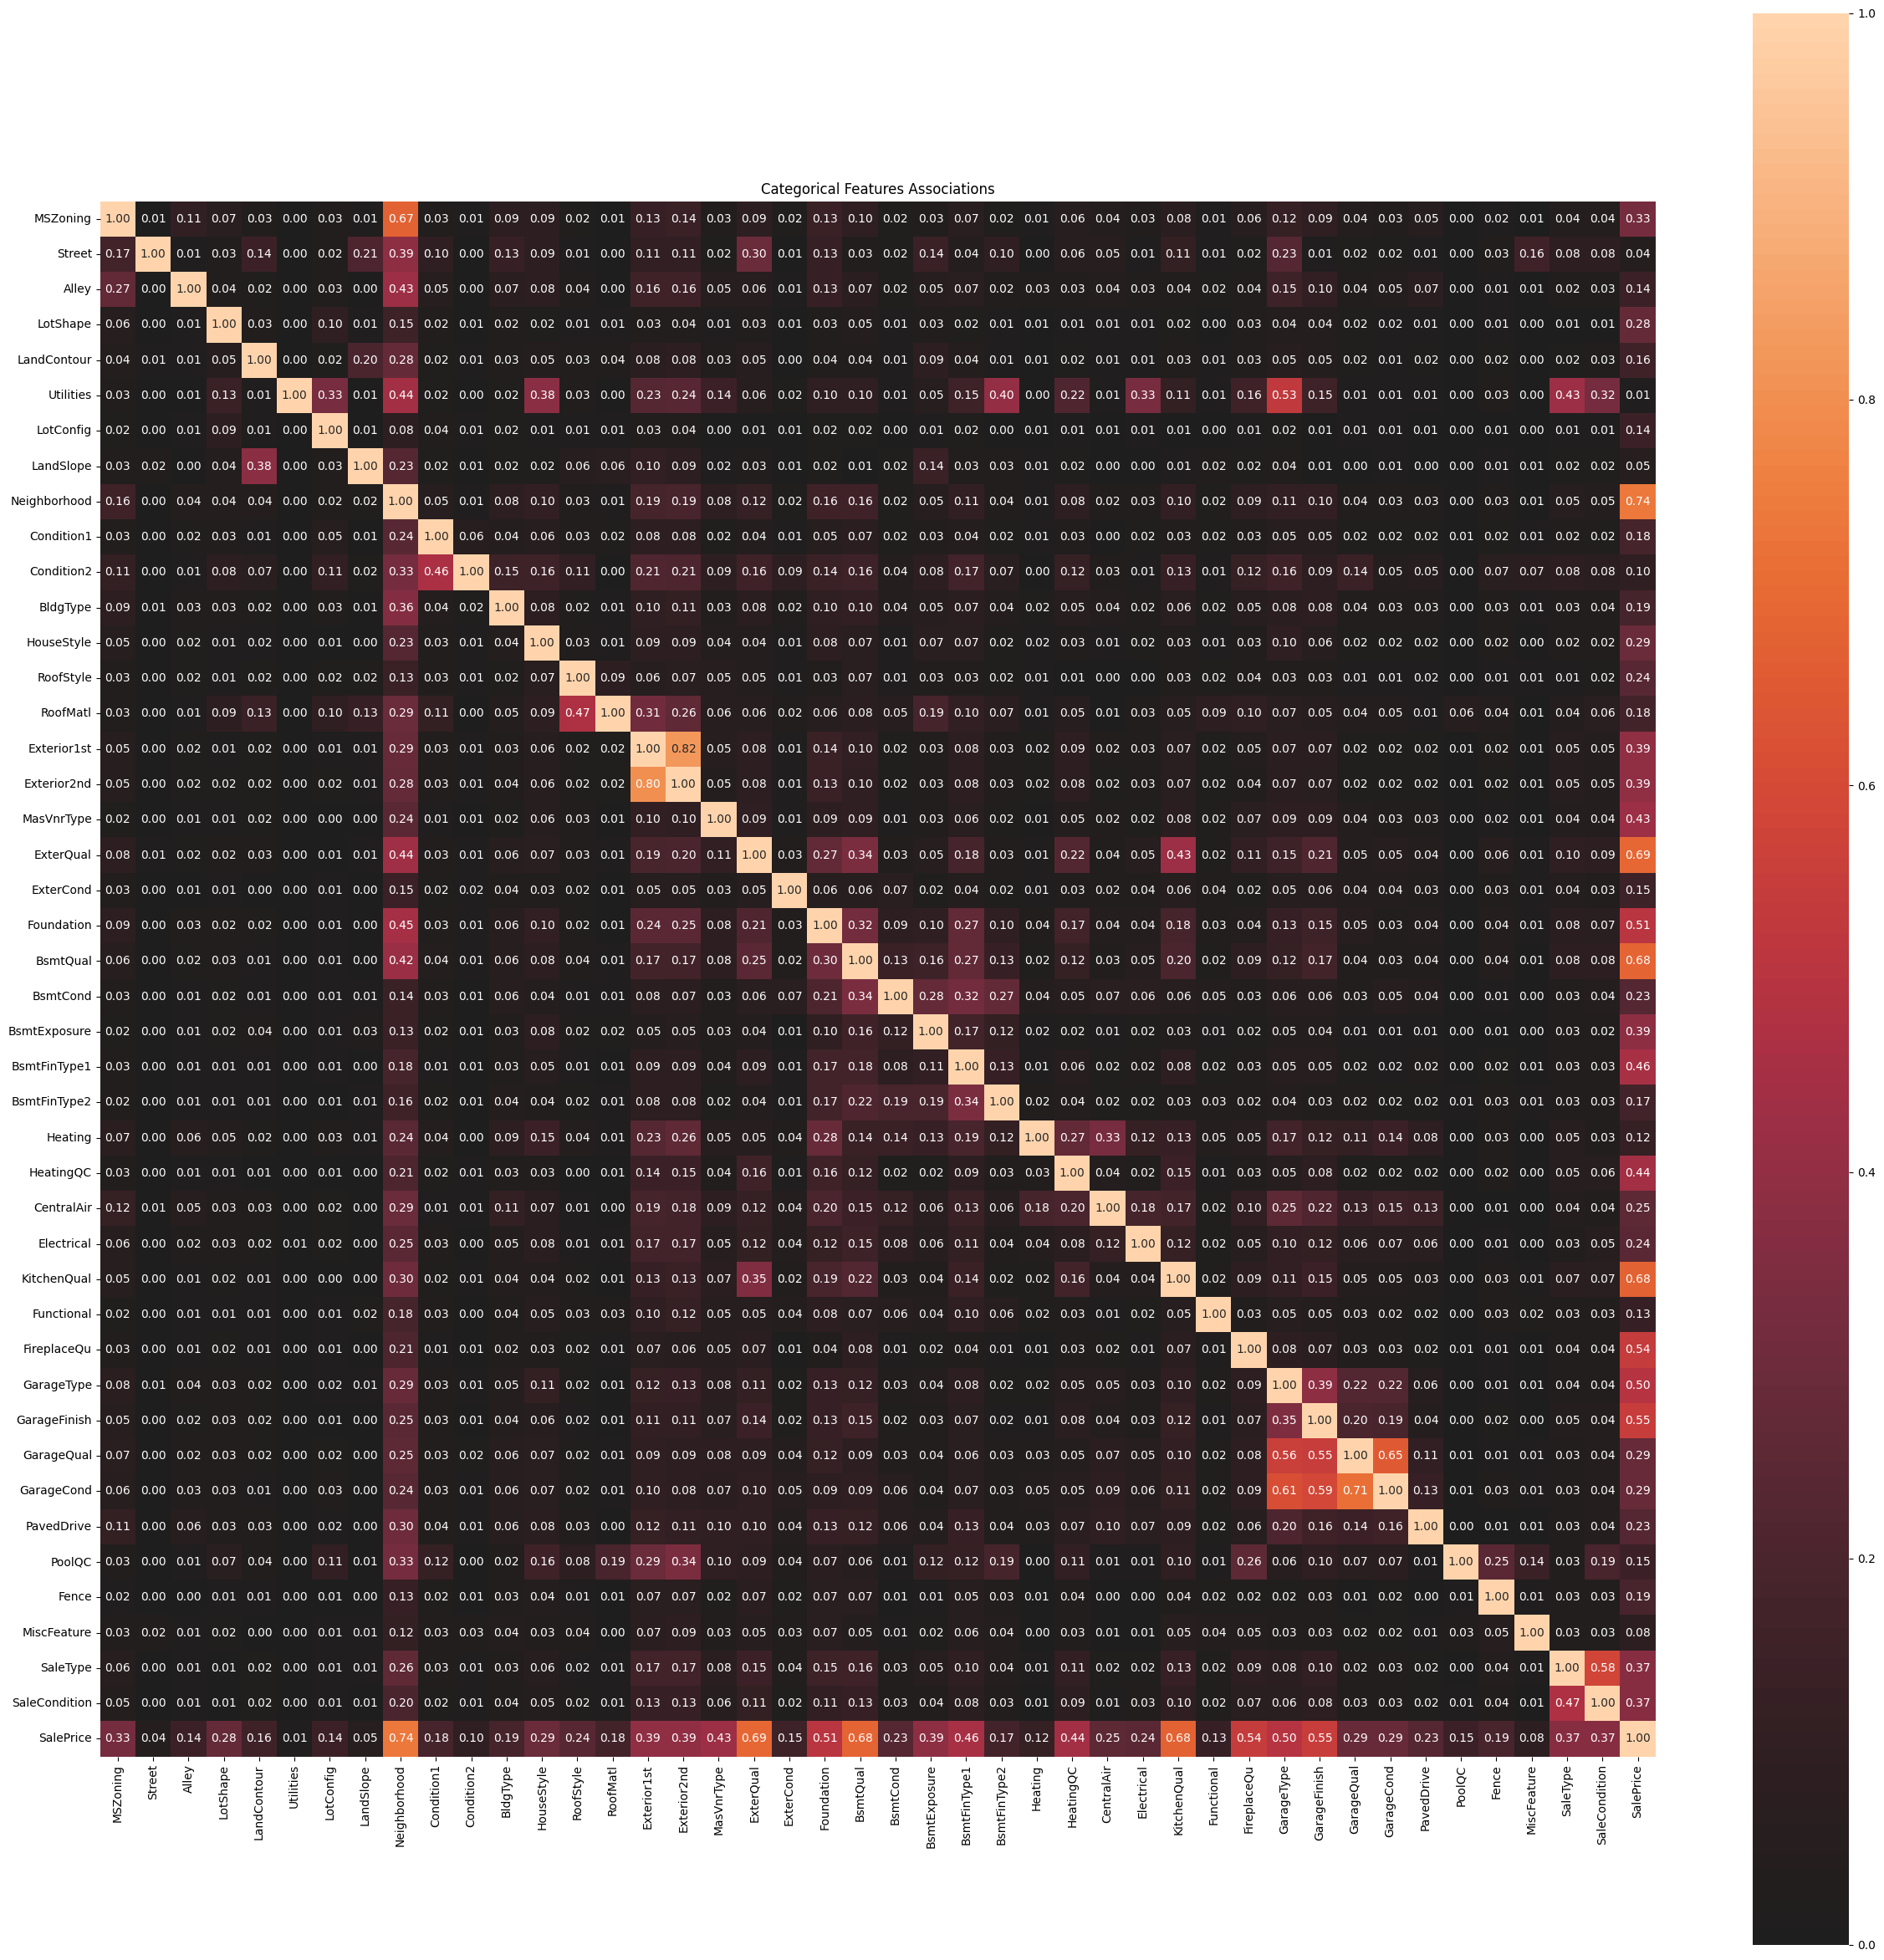

{'corr':                MSZoning    Street     Alley  LotShape  LandContour  Utilities  \
 MSZoning       1.000000  0.006639  0.107645  0.066144     0.025327   0.000235   
 Street         0.172577  1.000000  0.009934  0.033541     0.144930   0.000106   
 Alley          0.270281  0.000960  1.000000  0.037054     0.021266   0.000160   
 LotShape       0.058097  0.001133  0.012962  1.000000     0.026082   0.000958   
 LandContour    0.040000  0.008806  0.013377  0.046900     1.000000   0.000168   
 Utilities      0.028711  0.000497  0.007770  0.133336     0.012996   1.000000   
 LotConfig      0.022055  0.000745  0.008276  0.092640     0.012059   0.002219   
 LandSlope      0.030079  0.024143  0.003860  0.043844     0.380355   0.000162   
 Neighborhood   0.160478  0.003559  0.040465  0.040824     0.042246   0.000863   
 Condition1     0.034237  0.004202  0.020965  0.031688     0.012112   0.000162   
 Condition2     0.112651  0.000568  0.008879  0.078240     0.065658   0.000095   
 BldgTyp

In [41]:
associations(processed_train_df[cat_cols_2], figsize=(30, 30), nom_nom_assoc='theil', title='Categorical Features Associations')

As with the numerical variables, there are a number of features that are collinear. For instance, Exterior1st and Exterior2nd are collinear and feature engineering will need to be done to eliminate this.

## Mutual Information

Mutual information allows us to reduce the uncertainty of variables based on the information of other variables. If all you have available is a specific feature value, how much certainty would this give you about the value of the target variable? The mutual information score is measured on a logarithmic scale, therefore, scores over 2 are very rare given how logarithms increase slowly

In [42]:
def split_x_y_vars(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:
    """Split the dataframe into X and y variables.

    Args:
        df (pd.DataFrame): pandas dataframe

    Returns:
        tuple[pd.DataFrame, pd.Series]: X and y variables
    """
    X = df.copy()
    y = X.pop("SalePrice")
    return X, y

In [43]:
def factorize_cats(X: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:
    for col in X.select_dtypes(include='object'): 
        X[col], _ = X[col].factorize()

    discrete_features = X.dtypes == int
    
    return X, discrete_features

In [44]:
def create_mi_scores(X: pd.DataFrame, y: pd.Series, discrete_features: pd.Series) -> pd.Series:
    X_factored = factorize_cats(X)
    mi_scores = mutual_info_regression(X_factored, y, discrete_features=discrete_features).round(2)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [45]:
def plot_mi_scores(scores: pd.Series) -> None:
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(15, 15))
# plot_mi_scores(mi_scores)

We can see that the MI score rankings follow a similar ranking to the pearson correlation ranking between SalePrice and each numerical input. However, beacuse we have transformed categorical variables into Ordinal variables, we can get a measure each categorical variables impact on SalePrice.

Do these scores change if we take the natural logarithms of SalePrice?

In [46]:
# y = y.apply(np.log1p)
# sns.displot(y, kde=True)
# plt.show()

In [47]:
# log_mi_scores = create_mi_scores(X=X, y=y, discrete_features=discrete_features)

In [48]:
# plt.figure(dpi=100, figsize=(15, 15))
# plot_mi_scores(mi_scores)

Are there any interactions between SalePrice and Pool Quality?

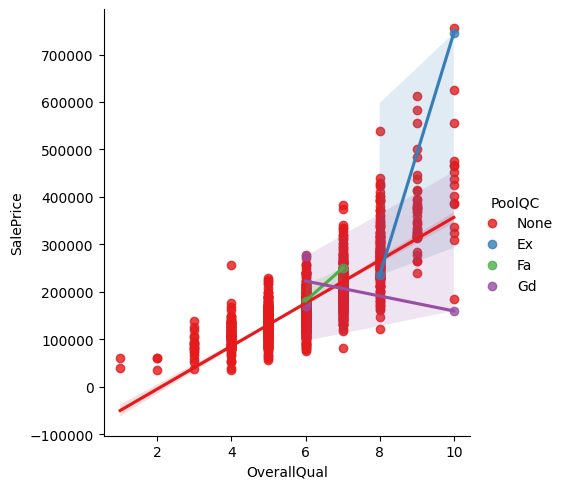

In [49]:
sns.lmplot(data=processed_train_df, x='OverallQual', y='SalePrice', hue='PoolQC', palette='Set1')
plt.show()

We can see that an excellent pool quality has a major impact on price and the quality of property, increasing the overall quality up towards 10. Therefore, it might be worthwhile leaving PoolQC as when we perform one hot encoding, excellent pool quality may be a factor that helps explain variation in sale price.

## Select the best variables

select the variables that offer the best interpretability based on correlation and MI score with the SalePrice. Then deal with multicollinearity

In [50]:
# drop columns with statistically insignificant correlation
def drop_statistically_insignificant_corr(df: pd.DataFrame) -> pd.DataFrame:
    corr_df = corr_significance(df, y_var='SalePrice')
    cols_to_drop = corr_df.loc[corr_df['significant'] == False]['Variable'].tolist()
    return df.drop(cols_to_drop, axis=1)

In [51]:
# delete variables with low mutual information scores
def select_high_mi_scores(df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    X, y = split_x_y_vars(df)
    X, discrete_features = factorize_cats(X)
    scores = create_mi_scores(X, y, discrete_features)
    low_mi_scores_cols = scores.loc[scores >= threshold].index.tolist() + ['SalePrice']
    return df[low_mi_scores_cols]

In [52]:
processed_train_df = processed_train_df.pipe(drop_statistically_insignificant_corr).pipe(
    select_high_mi_scores, 0.1
)

In [53]:
ord_cols = processed_train_df.filter(regex='Qual|Finish|FinType|QC|Qu').iloc[:, 1:].columns.tolist()
processed_train_df[ord_cols]

BsmtQual ExterQual KitchenQual GarageFinish FireplaceQu HeatingQC  \
0          Gd        Gd          Gd          RFn        None        Ex   
1          Gd        TA          TA          RFn          TA        Ex   
2          Gd        Gd          Gd          RFn          TA        Ex   
3          TA        TA          Gd          Unf          Gd        Gd   
4          Gd        Gd          Gd          RFn          TA        Ex   
...       ...       ...         ...          ...         ...       ...   
1455       Gd        TA          TA          RFn          TA        Ex   
1456       Gd        TA          TA          Unf          TA        TA   
1457       TA        Ex          Gd          RFn          Gd        Ex   
1458       TA        TA          Gd          Unf        None        Gd   
1459       TA        Gd          TA          Fin        None        Gd   

     BsmtFinType1  
0             GLQ  
1             ALQ  
2             GLQ  
3             ALQ  
4             GLQ  
...           ...  
1455          Unf  
1456          ALQ  
1457          GLQ  
1458          GLQ  
1459          BLQ  

[1460 rows x 7 columns]

In [54]:
ordinal = OrdinalEncoder(
    categories=[
        ["None", "Fa", "TA", "Gd", "Ex"],
        ["Fa", "TA", "Gd", "Ex"],
        ["Fa", "TA", "Gd", "Ex"],
        ["None", "Unf", "RFn", "Fin"],
        ["None", "Po", "Fa", "TA", "Gd", "Ex"],
        ["Po", "Fa", "TA", "Gd", "Ex"],
        ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ],
)
df = pd.DataFrame()
df[ord_cols] = ordinal.fit_transform(
    processed_train_df[ord_cols]
)


In [55]:
def feature_processor(df: pd.DataFrame) -> ColumnTransformer:

    # get numerical, ordinal and categorical columns
    num_cols = df.select_dtypes(include="number").columns
    ord_cols = df.filter(regex="Qual|Finish|FinType|QC|Qu").iloc[:, 1:].columns.tolist()
    cat_cols = [
        col for col in df.select_dtypes(include="object").columns if col not in ord_cols
    ]

    # ordinal transformer
    ordinal_transformer = Pipeline(
        steps=[
            (
                "ordinal",
                OrdinalEncoder(
                    categories=[
                        ["None", "Fa", "TA", "Gd", "Ex"],
                        ["None", "Fa", "TA", "Gd", "Ex"],
                        ["Fa", "TA", "Gd", "Ex"],
                        ["None", "Unf", "RFn", "Fin"],
                        ["None", "Po", "Fa", "TA", "Gd", "Ex"],
                        ["Po", "Fa", "TA", "Gd", "Ex"],
                        ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
                    ],
                ),
            ),
        ]
    )

    # categorical transformer
    cat_transformer = Pipeline(
        steps=[
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]
    )

    # numerical transformer
    num_transformer = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
        ]
    )

    return ColumnTransformer(
        transformers=[
            ("num", num_transformer, num_cols),
            ("cat", cat_transformer, cat_cols),
            ("ordinal", ordinal_transformer, ord_cols),
        ]
    )

In [56]:
def score_dataset(X_train: pd.DataFrame, y_train: pd.Series) -> float:
    model = GradientBoostingRegressor()
    preprocessor = feature_processor(X_train)

    eval_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    score = -cross_val_score(eval_pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error').mean()
    return np.sqrt(score)

In [57]:
X, y = split_x_y_vars(processed_train_df)

msle = score_dataset(X, y)
print(f'MSLE: {msle}')

MSLE: 0.1329702963841985


## Feature Engineering

Features identified as being collinear using VIF and correlation stats were:
- 1stFlrSF -> 2ndFlrSF, TotalBsmtSF
- GarageYrBlt -> YearBlt
- TotRmsAbvGrd -> GrLivArea
- GarageArea -> GarageCars
- YearRemodAdd -> GarageYrBlt

Need to create some new features that deal with multicollinearity and enhance the explainability of our models

## Principle Component Analysis

In [58]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

print("Correlation with SalePrice:\n")
print(processed_train_df[features].corrwith(processed_train_df.SalePrice))

Correlation with SalePrice:

GarageArea      0.623431
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
GrLivArea       0.708624
dtype: float64


In [59]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [60]:
X = processed_train_df.copy()
y = X.pop("SalePrice")
X = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X)
print(loadings)

                   PC1       PC2       PC3       PC4
GarageArea    0.542671  0.055849  0.172729 -0.820094
YearRemodAdd  0.418537 -0.883023 -0.052628  0.205735
TotalBsmtSF   0.518308  0.324224  0.617357  0.495082
GrLivArea     0.511558  0.334709 -0.765680  0.200032


In [61]:
def plot_variance(pca: PCA, width: int = 8, dpi: int = 100) -> plt.Axes:
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

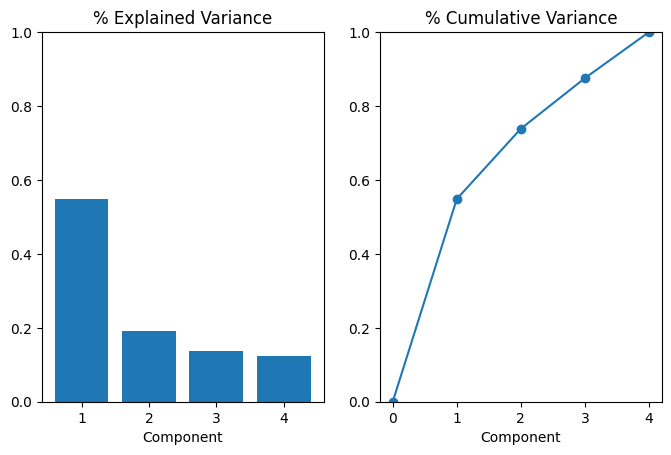

In [62]:
plot_variance(pca)
plt.show()

In [63]:
# mi scores for pca with SalePrice
create_mi_scores(X_pca, y, discrete_features=False)

PC1    0.83
PC2    0.23
PC3    0.18
PC4    0.05
Name: MI Scores, dtype: float64

In [64]:
# Show dataframe sorted by PC3
idx = X_pca["PC1"].sort_values(ascending=False).index
processed_train_df.loc[idx, ["SalePrice", "Neighborhood", 'OverallQual'] + features]

SalePrice Neighborhood  OverallQual  GarageArea  YearRemodAdd  \
1298     160000      Edwards           10        1418          2008   
523      184750      Edwards           10         884          2008   
1182     745000      NoRidge           10         813          1996   
691      755000      NoRidge           10         832          1995   
496      430000      NoRidge            8         546          1993   
...         ...          ...          ...         ...           ...   
1179      93000      Edwards            5           0          1954   
636       60000      BrkSide            2           0          1950   
705       55000       IDOTRR            4           0          1950   
1218      80500      BrkSide            4           0          1950   
533       39300      BrkSide            1           0          1950   

      TotalBsmtSF  GrLivArea  
1298         6110       5642  
523          3138       4676  
1182         2396       4476  
691          2444       4316  
496          3200       3228  
...           ...        ...  
1179            0       1124  
636           264        800  
705             0       1092  
1218            0        912  
533             0        334  

[1460 rows x 7 columns]

PCA has revealed that based on the chosen variables, the pattern suggests that houses with a larger area have a higher price.

In [65]:
processed_train_df['PC1'] = X_pca['PC1']

In [66]:
processed_train_df[['PC1', 'SalePrice']].corr()

PC1  SalePrice
PC1        1.000000   0.831222
SalePrice  0.831222   1.000000

## Clustering

In [67]:
def create_cluster(
    df: pd.DataFrame, cluster_features: pd.DataFrame, n_clusters: int = 6
) -> pd.DataFrame:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df.loc[:, "cluster"] = kmeans.fit_predict(cluster_features).astype(int)
    return df

In [68]:
processed_train_df = create_cluster(processed_train_df, features)

ValueError: could not convert string to float: 'GarageArea'

## Target Encoding

Neighbourhood variable has the most categorical features (25). We can use target encoding to create values for each category that are more reflective of their relationship with the target variable in comparison with OrdinalEncoder which has to be specified manually.

In [ ]:
# encode of 20% of data to avoid overfitting
X_encode = processed_train_df.sample(frac=0.2, random_state=42)
y_encode = X_encode.pop("SalePrice")

# split training data
X_pretrain, y_train = split_x_y_vars(processed_train_df)

encoder = MEstimateEncoder(cols=['Neighborhood'], m=1)

encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain, y_train)

X_train.head(3)

OverallQual   Neighborhood  GarageArea  GrLivArea  YearBuilt  TotalBsmtSF  \
0            7  187384.022546         548       1710       2003          856   
1            6  179279.937215         460       1262       1976         1262   
2            7  187384.022546         608       1786       2001          920   

   LotArea  GarageCars KitchenQual BsmtQual ExterQual  GarageYrBlt  \
0     8450           2          Gd       Gd        Gd       2003.0   
1     9600           2          TA       Gd        TA       1976.0   
2    11250           2          Gd       Gd        Gd       2001.0   

   MSSubClass  1stFlrSF  FullBath GarageFinish  YearRemodAdd  LotFrontage  \
0          60       856         2          RFn          2003         65.0   
1          20      1262         2          RFn          1976         80.0   
2          60       920         2          RFn          2002         68.0   

   TotRmsAbvGrd FireplaceQu GarageType Foundation  OpenPorchSF HeatingQC  \
0             8        None     Attchd      PConc           61        Ex   
1             6          TA     Attchd     CBlock            0        Ex   
2             6          TA     Attchd      PConc           42        Ex   

   Fireplaces  2ndFlrSF Exterior2nd BsmtFinType1  BsmtFinSF1 Exterior1st  \
0           0       854     VinylSd          GLQ         706     VinylSd   
1           1         0     MetalSd          ALQ         978     MetalSd   
2           1       866     VinylSd          GLQ         486     VinylSd   

   BsmtUnfSF MSZoning  OverallCond MasVnrType  WoodDeckSF       PC1  cluster  
0        150       RL            5    BrkFace           0  0.509445        1  
1        284       RL            8       None         298 -0.217737        0  
2        434       RL            5    BrkFace           0  0.791061        1

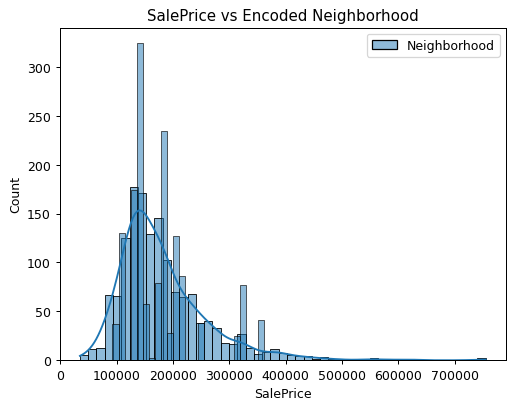

In [ ]:
feature = encoder.cols

plt.figure(dpi=90)
ax = sns.histplot(y_train, kde=True)
ax = sns.histplot(X_train[feature], color='r', ax=ax, kde=False)
ax.set_xlabel("SalePrice")
ax.set_title("SalePrice vs Encoded Neighborhood")
plt.show()

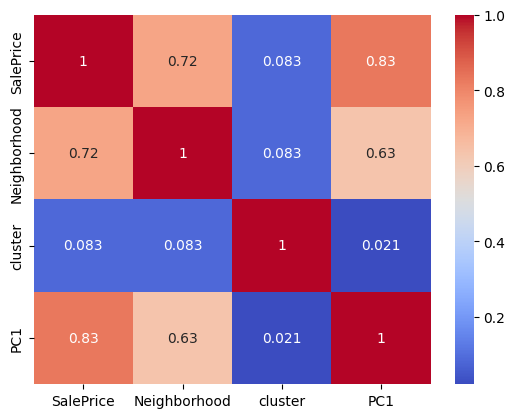

In [ ]:
# add Xtrain to ytrain
X_train['SalePrice'] = y_train

new_features = X_train[['SalePrice', 'Neighborhood', 'cluster', 'PC1']].corr()

sns.heatmap(new_features, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
create_mi_scores(X_train[['Neighborhood', 'cluster', 'PC1']], y_train, discrete_features=False)

PC1             0.83
Neighborhood    0.51
cluster         0.47
Name: MI Scores, dtype: float64

## Re-model data with PCA, Clustering & Target Encoding

In [ ]:
score_dataset(X_train.drop(columns=['SalePrice']), y_train)

0.13012649383670305

Model performs better by 0.002

## General Feature engineering

Numerical variables

In [ ]:
def create_diff_year_garage_built(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'DiffYearGarageBuilt'] = df['GarageYrBlt'] - df['YearBuilt']
    return df

In [ ]:
def create_room_area(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'RoomAreaRatio'] = df['GrLivArea'] / df['TotRmsAbvGrd']
    
    return df

In [ ]:
def create_garage_area_per_car(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']
    df.loc[:, 'GarageAreaPerCar'] = df['GarageAreaPerCar'].fillna(0)
    return df

In [ ]:
def create_diff_mod_garage_year_blt(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'DiffModGarageYearBuilt'] = df['YearRemodAdd'] - df['GarageYrBlt']
    return df

In [ ]:
def create_other_rooms_col(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'OtherRooms'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr'] - df['KitchenAbvGr']
    return df

Investigate area variables

In [ ]:
def ratio_land_to_property(df: pd.DataFrame) -> pd.DataFrame:
    cols = df.filter(regex='Area|SF').columns[1:]
    cols = [col for col in cols if 'Total' not in col and 'GrLivArea' not in col] + ['LotFrontage']
    df.loc[:, 'LandToPropertyRatio'] = df['LotArea'] / df[cols].sum(axis=1)
    return df

In [ ]:
def create_qual_cond_metric(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'QualCondMetric'] = df['OverallQual'] + df['OverallCond']
    return df

In [ ]:
def create_bath_bedroom_ratio_abv(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'BathBedroomRatioAbv'] = df['FullBath'] / df['BedroomAbvGr']
    df.loc[:, 'BathBedroomRatioAbv'] = df['BathBedroomRatioAbv'].fillna(0)
    df.loc[:, 'BathBedroomRatioAbv'] = df['BathBedroomRatioAbv'].replace([np.inf, -np.inf], 0)
    return df

In [ ]:
def create_basement_flat_bool(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'IsBasementProperty'] = np.where(df['BedroomAbvGr'] == 0, True, False)
    return df

Remove columns that are explainable by other columns or have been captured above by an interaction variable. For example, GrLivArea is explained by 1stFlrSF and 2ndFlrSF as they both add up to make GrLivArea. 

In [ ]:
# def remove_cols(df: pd.DataFrame) -> pd.DataFrame:

#     cols_to_drop = [
#         "GrLivArea",
#         "GarageYrBlt",
#         "TotRmsAbvGrd",
#         "GarageArea",
#         "GarageCars",
#         "YearRemodAdd",
#         "YearBuilt",
#         # "OverallQual",
#         # "OverallCond",
#     ]
#     return df.drop(cols_to_drop, axis=1)

### Create pipeline to create new variables

In [ ]:
def feature_engineer_pipeline(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()
    
    return (
        data.pipe(create_diff_year_garage_built)
        .pipe(create_room_area)
        .pipe(create_garage_area_per_car)
        .pipe(create_diff_mod_garage_year_blt)
        .pipe(create_other_rooms_col)
        .pipe(ratio_land_to_property)
        # .pipe(create_qual_cond_metric)
        .pipe(create_bath_bedroom_ratio_abv)
        .pipe(create_basement_flat_bool)
        # .pipe(remove_cols)
    )

In [ ]:
X_train

OverallQual   Neighborhood  GarageArea  GrLivArea  YearBuilt  \
0               7  187384.022546         548       1710       2003   
1               6  179279.937215         460       1262       1976   
2               7  187384.022546         608       1786       2001   
3               7  201357.976455         642       1717       1915   
4               8  362315.534627         836       2198       2000   
...           ...            ...         ...        ...        ...   
1455            6  175946.920776         460       1647       1999   
1456            6  184061.226455         500       2073       1978   
1457            7  201357.976455         252       2340       1941   
1458            5  140301.062481         240       1078       1950   
1459            5  133767.129403         276       1256       1965   

      TotalBsmtSF  LotArea  GarageCars KitchenQual BsmtQual ExterQual  \
0             856     8450           2          Gd       Gd        Gd   
1            1262     9600           2          TA       Gd        TA   
2             920    11250           2          Gd       Gd        Gd   
3             756     9550           3          Gd       TA        TA   
4            1145    14260           3          Gd       Gd        Gd   
...           ...      ...         ...         ...      ...       ...   
1455          953     7917           2          TA       Gd        TA   
1456         1542    13175           2          TA       Gd        TA   
1457         1152     9042           1          Gd       TA        Ex   
1458         1078     9717           1          Gd       TA        TA   
1459         1256     9937           1          TA       TA        Gd   

      GarageYrBlt  MSSubClass  1stFlrSF  FullBath GarageFinish  YearRemodAdd  \
0          2003.0          60       856         2          RFn          2003   
1          1976.0          20      1262         2          RFn          1976   
2          2001.0          60       920         2          RFn          2002   
3          1998.0          70       961         1          Unf          1970   
4          2000.0          60      1145         2          RFn          2000   
...           ...         ...       ...       ...          ...           ...   
1455       1999.0          60       953         2          RFn          2000   
1456       1978.0          20      2073         2          Unf          1988   
1457       1941.0          70      1188         2          RFn          2006   
1458       1950.0          20      1078         1          Unf          1996   
1459       1965.0          20      1256         1          Fin          1965   

      LotFrontage  TotRmsAbvGrd FireplaceQu GarageType Foundation  \
0            65.0             8        None     Attchd      PConc   
1            80.0             6          TA     Attchd     CBlock   
2            68.0             6          TA     Attchd      PConc   
3            60.0             7          Gd     Detchd     BrkTil   
4            84.0             9          TA     Attchd      PConc   
...           ...           ...         ...        ...        ...   
1455         62.0             7          TA     Attchd      PConc   
1456         85.0             7          TA     Attchd     CBlock   
1457         66.0             9          Gd     Attchd      Stone   
1458         68.0             5        None     Attchd     CBlock   
1459         75.0             6        None     Attchd     CBlock   

      OpenPorchSF HeatingQC  Fireplaces  2ndFlrSF Exterior2nd BsmtFinType1  \
0              61        Ex           0       854     VinylSd          GLQ   
1               0        Ex           1         0     MetalSd          ALQ   
2              42        Ex           1       866     VinylSd          GLQ   
3              35        Gd           1       756     Wd Shng          ALQ   
4              84        Ex           1      1053     VinylSd          GLQ   
...           ...       ...   

In [ ]:
new_features_df = feature_engineer_pipeline(X_train)

# create_mi_scores(new_features_df, y, discrete_features=False)

new_features_df.head()

KeyError: 'BedroomAbvGr'

In [ ]:
X = new_train_df.copy()
y = X.pop('SalePrice')

for col in X.select_dtypes(include='object'): 
    X[col], _ = X[col].factorize()

discrete_features = X.dtypes == int


create_mi_scores(X=X, y=y, discrete_features=discrete_features).head(20)

OverallQual            0.57
Neighborhood           0.53
GarageArea             0.50
GrLivArea              0.43
YearBuilt              0.41
TotalBsmtSF            0.40
LotArea                0.39
GarageCars             0.36
BsmtQual               0.33
KitchenQual            0.33
ExterQual              0.33
GarageYrBlt            0.30
1stFlrSF               0.28
MSSubClass             0.28
YearRemodAdd           0.27
FullBath               0.26
GarageFinish           0.26
RoomAreaRatio          0.25
OtherRooms             0.24
BathBedroomRatioAbv    0.24
Name: MI Scores, dtype: float64